### Visualizations

#### Environment: Scanpy

- **Developed by:** Carlos Talavera-López Ph.D
- **Modified by:** Alexandra Cirnu
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Date of creation:** 240726
- **Date of modification:** 240726

### Import required modules

In [154]:
import anndata
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
import matplotlib.pyplot as plt
import muon as mu
from muon import atac as ac
from muon import prot as pt
from scipy.sparse import csr_matrix

### Set up working environment

In [155]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')
%matplotlib inline

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.2.0
asttokens           NA
colorama            0.4.6
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.10.0
igraph              0.11.4
ipykernel           6.29.2
ipywidgets          8.1.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.3
matplotlib_inline   0.1.6
mpl_toolkits        NA
mudata              0.2.3
muon                0.1.5
natsort             8.4.0
numba               0.59.0
numpy               1.26.4
packaging           23.2
pandas              2.2.1
parso               0.8.3
patsy               0.5.6
pickleshare         0.7.5
platformdirs        4.2.0
prompt_toolkit      3.0.42
psutil              5.9.8
pure_eva

In [156]:
condition_colors = {
    "Pkp2_Ctr_noninf":      "#D3D3D3",      # Light Gray
    "Pkp2_Ctr_MCMV":        "#686868",      # Dark Gray
    "Pkp2_HetKO_noninf":    "#F88379",      # Light Red
    "Pkp2_HetKO_MCMV":      "#DA0024",      # Red
    "Ttn_Ctr_noninf":       "#D3D3D3",      # Light Gray
    "Ttn_Ctr_MCMV":         "#686868",      # Dark Gray
    "Ttn_HetKO_noninf":     "#F88379",      # Light Red
    "Ttn_HetKO_MCMV":       "#DA0024",      # Red
}

### Read in data

In [157]:
#Take the seed labelled data set of Pkp2_Ctr_noninf+Ttn_Ctr_noninf as input

mdata = mu.read_h5mu('/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_annotated_muon_ac240727.raw.h5mu')     
mdata

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [158]:
adata = mdata.mod['rna']
adata

AnnData object with n_obs × n_vars = 44586 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [159]:
def X_is_raw(adata): return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

X_is_raw(adata)

True

In [160]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
X_data_df

Shape of counts DataFrame: (44586, 29378)


,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Vmn2r122,Il11ra2-1,Ccl27a-1,Ccl21c-1,Ccl27a-2,Il11ra2-2,Ccl19-1,Ccl21a-1,Gm10931,Gm16367
AAACGCTGTTGTGTTG-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTTCTCGCTCA-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGTACAGAACATA-1-A1,0,0,0,0,0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCAGGGACACT-1-A1,0,0,0,0,0,0,0,0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCCAGTAGGAC-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGAGAGATTAGCA-1-B2,0,0,0,0,0,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTAGCACCTGC-1-B2,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGAGACCTCCG-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cytokine Genes - from Serum Cytokine analysis with Okolab system

In [161]:
adata.var_names = adata.var_names.astype(str)
cytokine_genes = ['Cxcl1', 'Cxcl2', 'Cxcl12', 'Cxcl9', 'Ccl5', 'Ccl17', 'Ccl2', 'Ccl12', 'Ccl4', 'Ccl22', 'Ccl11', 'Il4', 'Il6', 'Il21', 'Il33', 'Il9', 'Il17a', 'Il1b', 'Il7',
                  'Il17f', 'Il31', 'Il22', 'Il10', 'Il1a', 'Il3', 'Il12a', 'Il12b', 'Il5', 'Il16', 'Il2', 'Il27', 'Csf3', 'Csf1', 'Csf2', 'Ifng', 'Tnf', 'Ifnl2', 'Ifna2', 'Ctla4', 'Pdcd1lg2', 'Cd274', 'Hgf', 'Fgf21',        #cytokines and chemokines, Missing: Cxcl11
                   
                   "Cxcr2", "Cxcr1", "Cxcr3", "Cxcr4", "Ackr3", "Ccr1", "Ccr3", "Ccr5", "Ccr4", "Ccr2", "Ccr8", "Il4ra", "Il6ra", "Il21r", "Il1rl1", "Il9r", 
                   "Il17ra", "Il17rc", "Il1r1", "Il1rap", "Il7r", "Il31ra", "Osmr", "Il22ra1", "Il10rb", "Il10ra", "Il3ra", "Il12rb1", "Il12rb2", "Il5ra", "Cd4", 
                   "Il2ra", "Il2rb", "Il2rg", "Il27ra", "Il6st", "Csf3r", "Csf1r", "Csf2ra", "Csf2rb", "Ifngr1", "Ifngr2", "Ifnlr1", "Ifnar1", 
                   "Ifnar2", "Tnfrsf1a", "Tnfrsf1b", "Cd80", "Cd86", "Pdcd1", "Met", "Fgfr1", "Klb" ] #receptors they bind to

cytokine_adata = adata[:, adata.var_names.isin(cytokine_genes)]
cytokine_adata

View of AnnData object with n_obs × n_vars = 44586 × 96
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

### Normalize counts for adata and cytokine_adata separately

In [162]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell


    finished (0:00:00)


In [163]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
X_data_df

Shape of counts DataFrame: (44586, 29378)


,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Vmn2r122,Il11ra2-1,Ccl27a-1,Ccl21c-1,Ccl27a-2,Il11ra2-2,Ccl19-1,Ccl21a-1,Gm10931,Gm16367
AAACGCTGTTGTGTTG-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTTCTCGCTCA-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGTACAGAACATA-1-A1,0,0,0,0,0,0,0,0,0,1.03457,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCAGGGACACT-1-A1,0,0,0,0,0,0,0,0,0.557832,0.913793,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCCAGTAGGAC-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,0,0,0,0,0,0,0,0,0.628428,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGAGAGATTAGCA-1-B2,0,0,0,0,0,0,0,0,0.702091,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTAGCACCTGC-1-B2,0,0,0,0,0,0,0,0,0,1.449141,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGAGACCTCCG-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
sc.pp.normalize_total(cytokine_adata, target_sum=1e4)
sc.pp.log1p(cytokine_adata)

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [165]:
X_data = cytokine_adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=cytokine_adata.obs.index, columns=cytokine_adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
X_data_df

Shape of counts DataFrame: (44586, 96)


,Il17a,Il17f,Il1r1,Il1rl1,Ctla4,Cxcr2,Cxcr1,Ackr3,Pdcd1,Cxcr4,...,Ifnar1,Ifngr2,Tnf,Csf1r,Cd274,Pdcd1lg2,Il33,Csf2ra,Il2rg,Cxcr3
AAACGCTGTTGTGTTG-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTTCTCGCTCA-1-A1,0,0,5.915433,0,0,0,0,0,0,0,...,5.915433,0,0,5.915433,0,0,0,0,0,0
AAAGGTACAGAACATA-1-A1,0,0,0,0,0,0,0,0,0,6.333009,...,5.424928,5.424928,5.816137,6.011057,6.099186,0,0,5.7206,5.7206,0
AAAGTCCAGGGACACT-1-A1,0,0,0,6.191882,0,0,0,0,0,5.448524,...,5.448524,5.448524,0,7.010991,0,0,0,6.470841,0,0
AAAGTCCCAGTAGGAC-1-A1,0,0,0,0,0,0,0,0,0,0,...,6.247642,5.522335,0,6.897417,0,0,0,5.522335,5.522335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,0,0,0,5.366926,0,0,0,0,0,0,...,0,6.081826,0,0,0,0,0,5.366926,5.366926,0
TTTGGAGAGATTAGCA-1-B2,0,0,0,0,0,0,0,0,0,6.854042,...,0,5.73265,0,0,0,0,0,6.265717,0,5.73265
TTTGGTTAGCACCTGC-1-B2,0,0,0,0,6.668496,0,0,0,6.504476,0,...,0,0,0,0,0,6.174213,0,0,6.174213,0
TTTGTTGAGACCTCCG-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.236959,0,0,0,7.535238,0


### Create a dotplot for each condition over all celltypes

In [166]:
conditions = cytokine_adata.obs['condition'].unique()

for condition in conditions:
    condition_adata = cytokine_adata[cytokine_adata.obs['condition'] == condition]
    
    sc.pl.dotplot(
        condition_adata,
        var_names=cytokine_genes,   
        groupby='annotation', 
        standard_scale='var',        # Standardize gene expression for better visualization
        dot_min=0.1,                
        dot_max=1,                 
        color_map="RdPu",        
        title=f'Dot plot for condition: {condition}',  
        swap_axes=False,             # Keep cytokines on y-axis and cell types on x-axis
        show=False                    
    )
    
    plt.savefig(f'dotplot_condition_{condition}.png') 
    plt.close()


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

### Create a dotplot for each celltype over all conditions

In [167]:
cell_types = cytokine_adata.obs['general_celltype'].unique()

for cell_type in cell_types:
    cell_type_adata = cytokine_adata[cytokine_adata.obs['general_celltype'] == cell_type]
    
    # Create a dot plot for the current cell type
    sc.pl.dotplot(
        cell_type_adata,
        var_names=cytokine_genes,    
        groupby='condition',         
        standard_scale='var',        # Standardize gene expression for better visualization
        dot_min=0.1,                
        dot_max=1,                
        color_map="RdPu",         
        title=f'Dot plot for {cell_type}',  # Title specific to the cell type
        swap_axes=True,              # Swap axes so conditions are on x-axis and genes on y-axis
        show=False                  
    )
    plt.savefig(f'dotplot_{cell_type}.png')  
    plt.close()

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

### Create a dotplot for all celltypes over all conditions in one graph

In [168]:
sc.pl.dotplot(
    cytokine_adata, 
    var_names=cytokine_genes,   
    groupby='condition',       
    standard_scale='var',       # Standardize gene expression (across conditions) for better visualization
    dot_min=0.1,            
    dot_max=1,               
    color_map="RdPu",       
    title='Dot plot of cytokine gene expression across conditions',
    swap_axes=True,              # Swap axes so conditions are on x-axis and genes are on y-axis
    show= False
)

plt.savefig('dotplot_all_celltypes.png')  
plt.close()

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

### Checking which cytokine is most differently expressed

#### Comparing 2 Conditions - Pkp2_HetKO_noninf vs Pkp2_Ctr_noninf

In [169]:
condition_of_interest = "Pkp2_HetKO_noninf"  
reference_condition = "Pkp2_Ctr_noninf"     

subset_adata = cytokine_adata[cytokine_adata.obs['condition'].isin([condition_of_interest, reference_condition])]
subset_adata

View of AnnData object with n_obs × n_vars = 10477 × 96
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'log1p'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [170]:
sc.tl.rank_genes_groups(subset_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
diff_expr_results = subset_adata.uns['rank_genes_groups']
genes_df = pd.DataFrame({
    'gene': diff_expr_results['names'][condition_of_interest],
    'logfoldchanges': diff_expr_results['logfoldchanges'][condition_of_interest],
    'pvals': diff_expr_results['pvals'][condition_of_interest],
    'pvals_adj': diff_expr_results['pvals_adj'][condition_of_interest]})

cytokine_diff_expr = genes_df[genes_df['gene'].isin(cytokine_genes)]
cytokine_diff_expr_sorted = cytokine_diff_expr.sort_values(by='logfoldchanges', ascending=False)
cytokine_diff_expr_sorted.head(5)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,gene,logfoldchanges,pvals,pvals_adj
57,Il21,20.906113,9.767108e-01,1.000000e+00
59,Fgf21,19.625422,9.883542e-01,1.000000e+00
45,Il5,4.008950,7.409214e-01,1.000000e+00
0,Ccr2,1.835292,8.433322e-51,8.095989e-49
50,Il33,1.672519,8.958615e-01,1.000000e+00


#### Barplot

/tmp/ipykernel_1355311/1710045121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


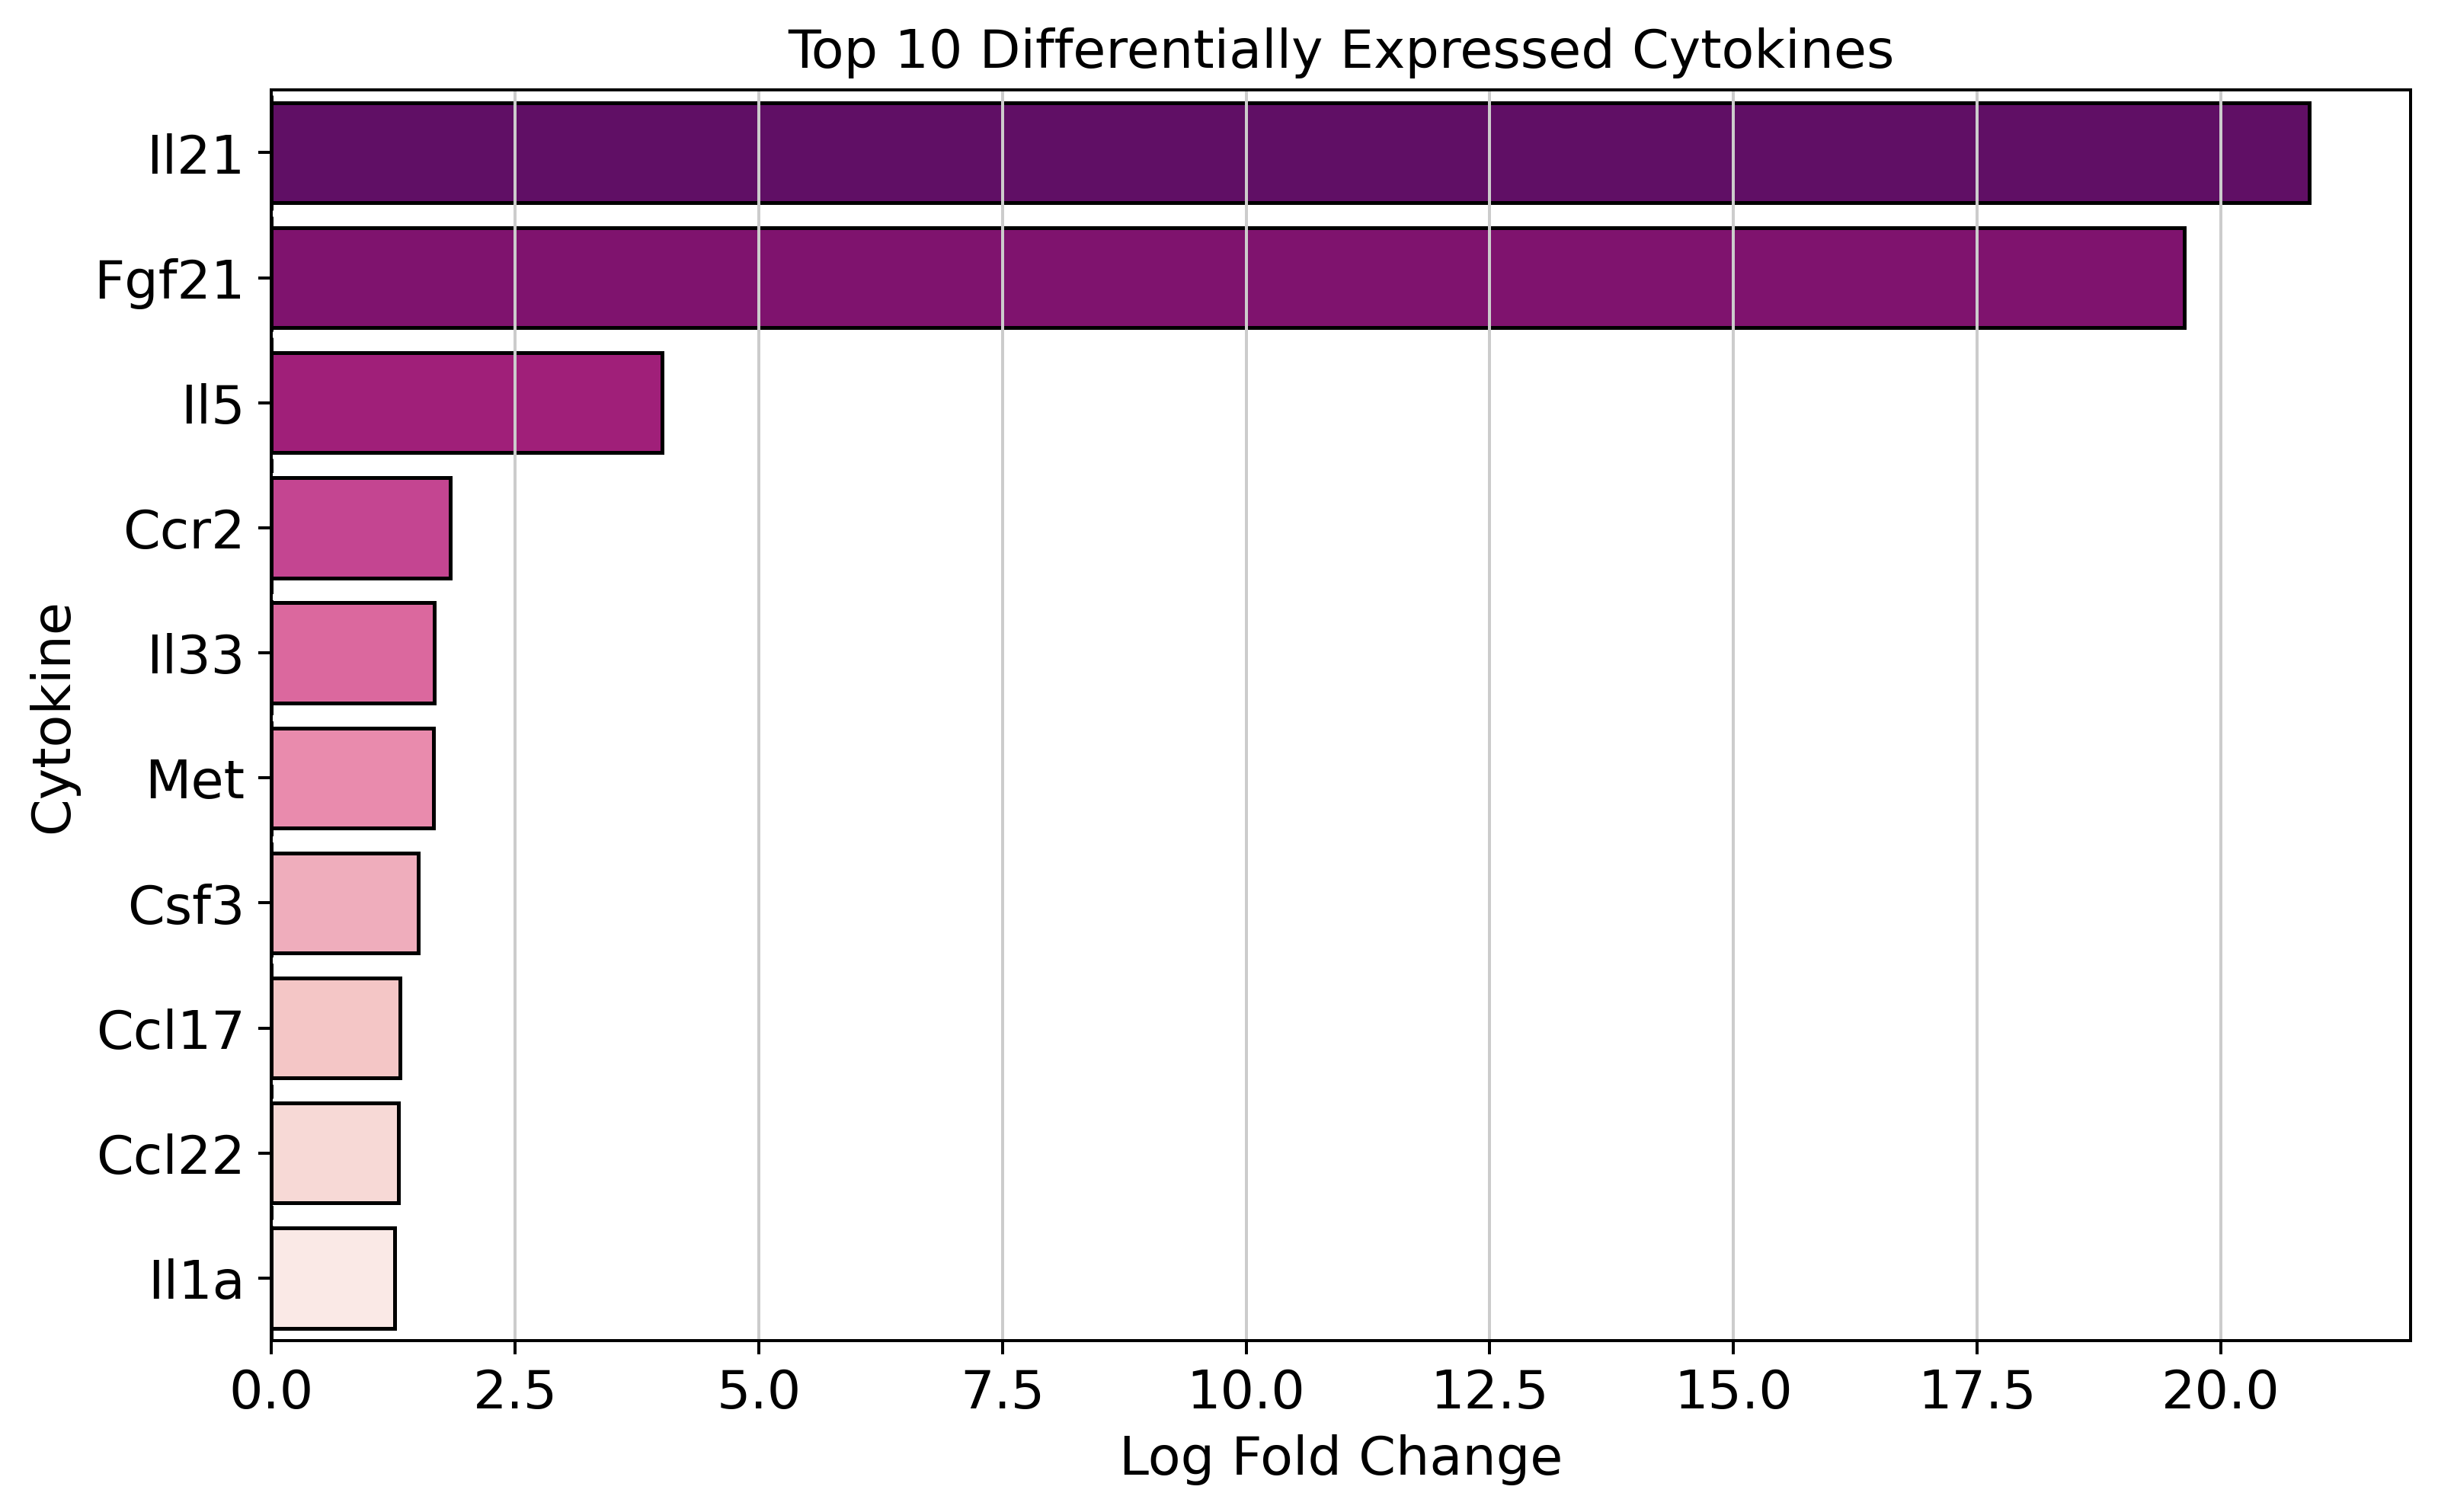

In [171]:
top_n = 10  # Number of top cytokines to plot
top_cytokines = cytokine_diff_expr_sorted.head(top_n)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='logfoldchanges', 
    y='gene', 
    data=top_cytokines, 
    palette='RdPu' if top_cytokines['logfoldchanges'].min() < 0 else 'RdPu_r',
    edgecolor='black')

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title(f'Top {top_n} Differentially Expressed Cytokines')
plt.xlabel('Log Fold Change')
plt.ylabel('Cytokine')
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-noninf_vs_Pkp2-Ctr-noninf_Barplot.png')
plt.show()

#### Volcano Plot

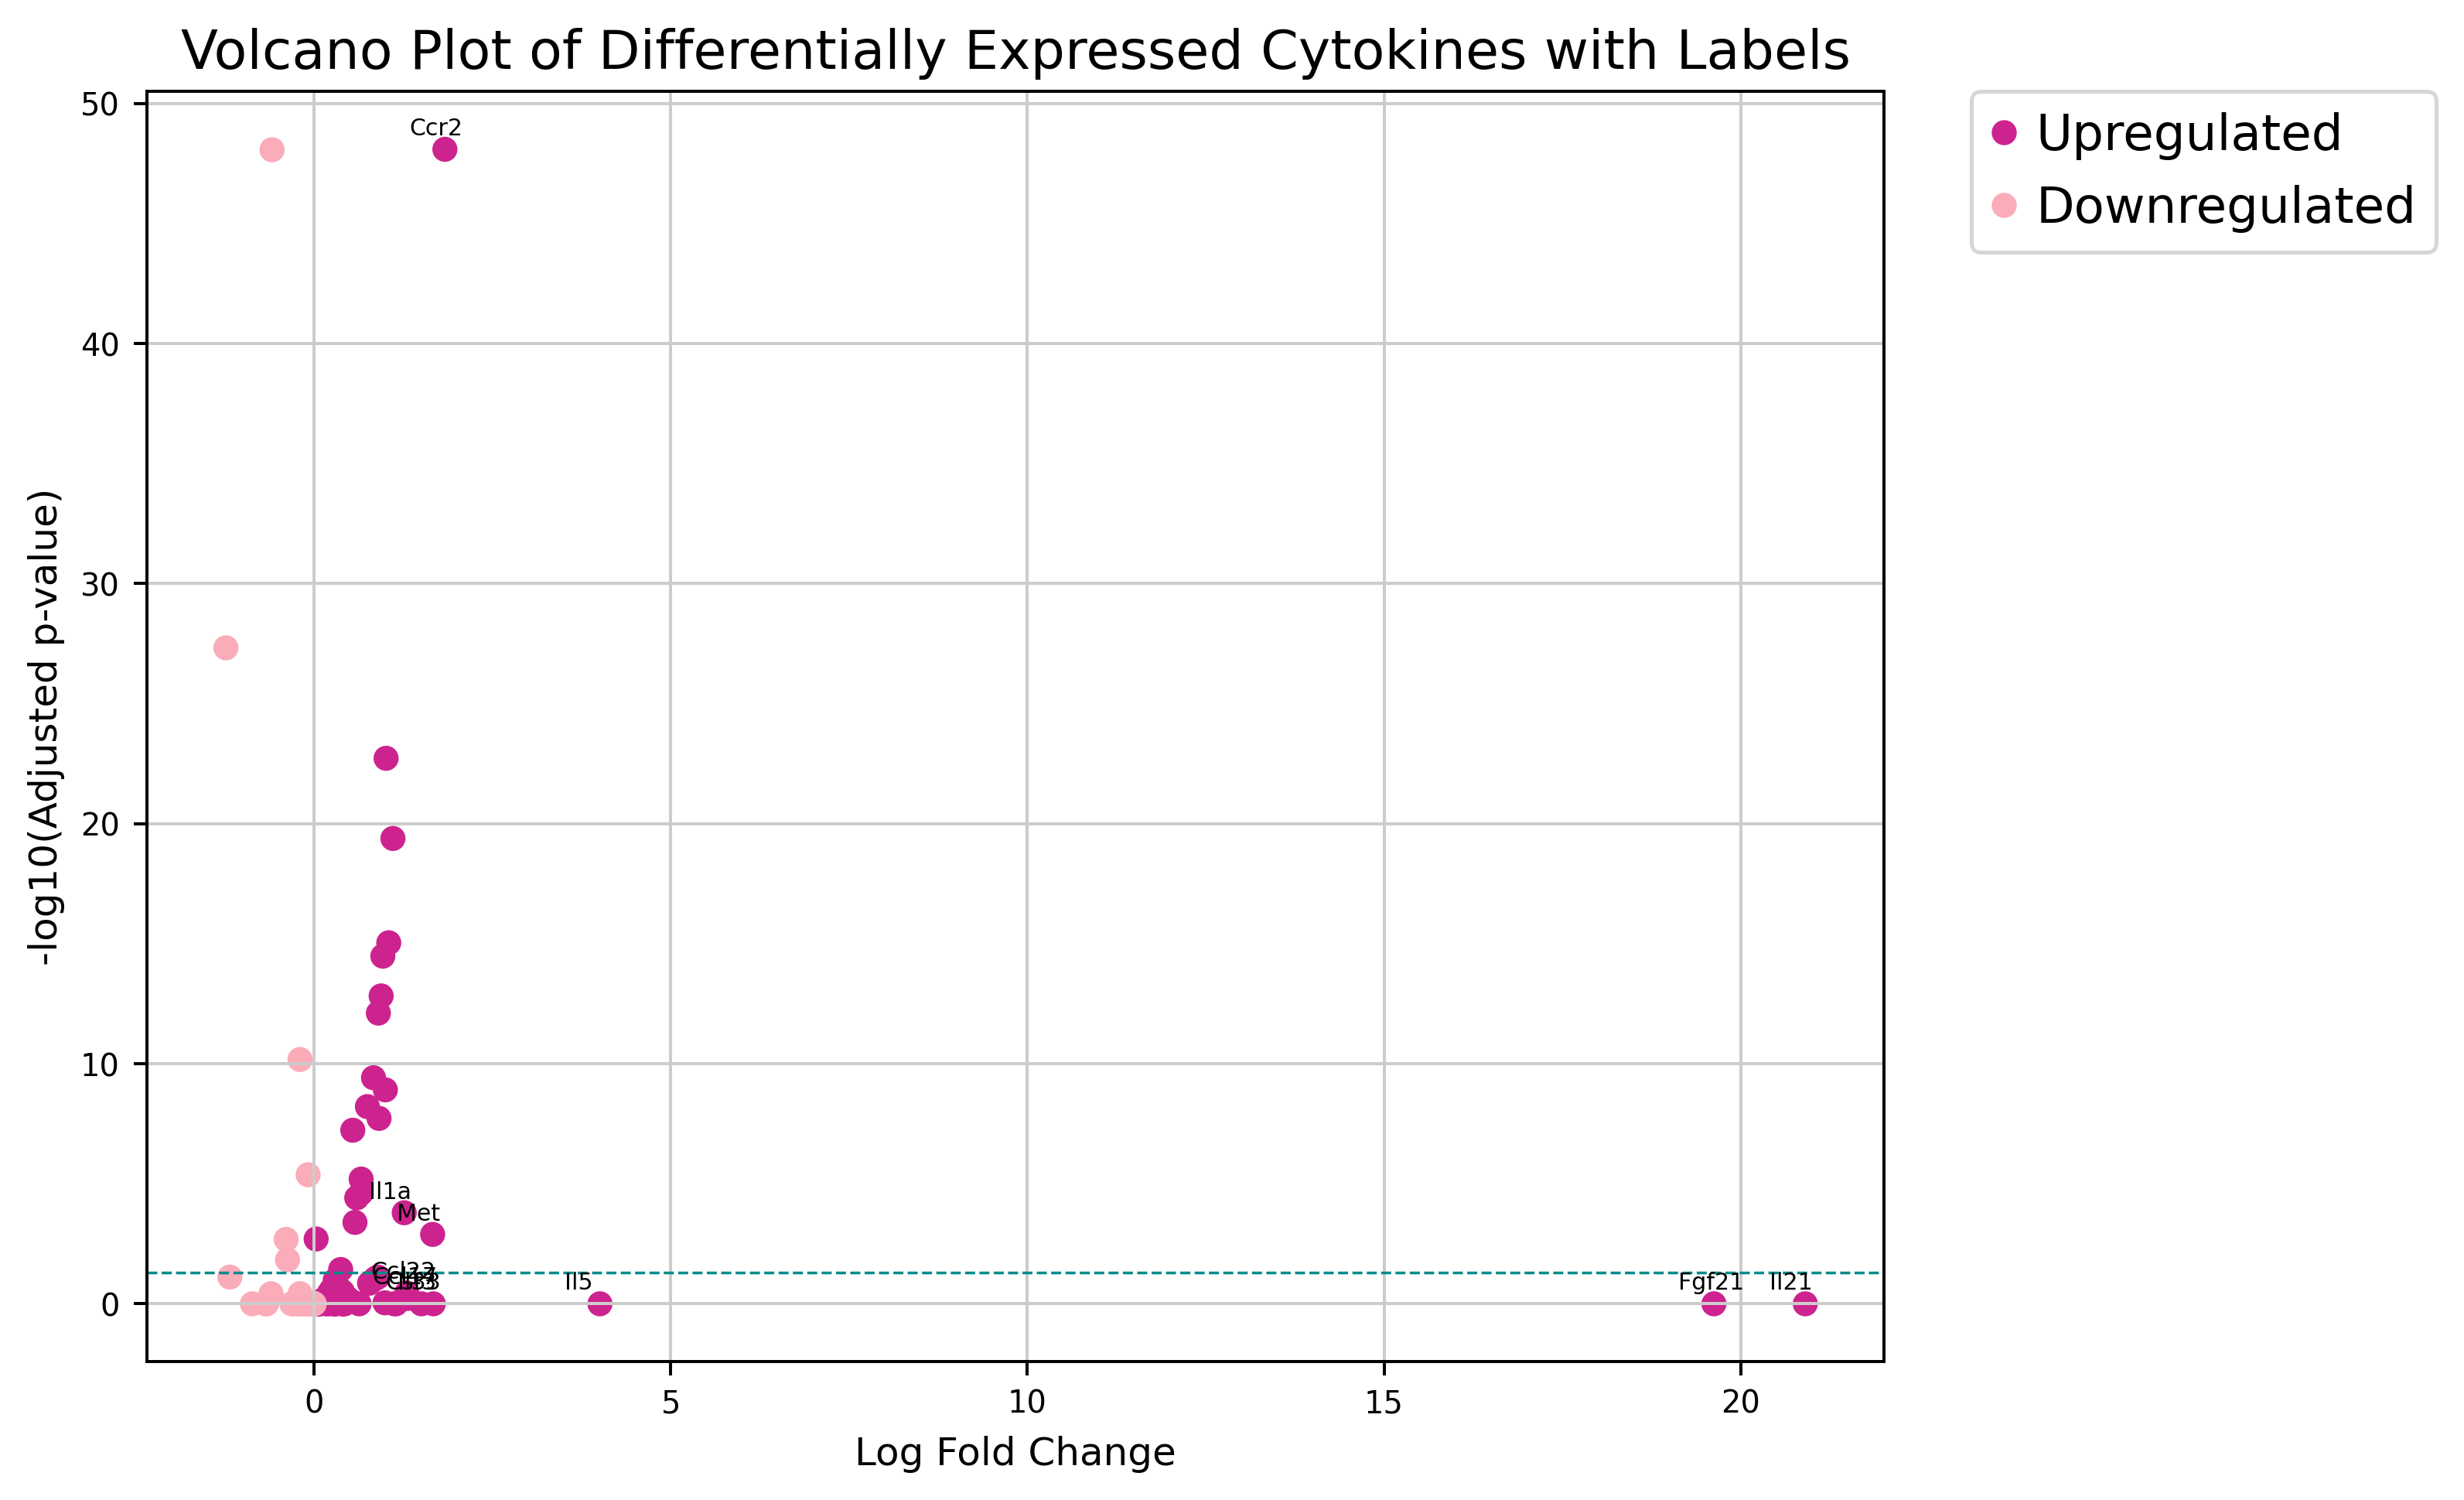

In [172]:
cytokine_diff_expr_sorted['regulation'] = ['Upregulated' if x > 0 else 'Downregulated' for x in cytokine_diff_expr_sorted['logfoldchanges']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='logfoldchanges', 
    y=-np.log10(cytokine_diff_expr_sorted['pvals_adj']), 
    data=cytokine_diff_expr_sorted,
    hue='regulation', 
    palette='RdPu_r',    
    edgecolor=None)

plt.axhline(-np.log10(0.05), linestyle='--', color='darkcyan', linewidth=0.7)

for i in range(top_n):
    plt.text(
        x=cytokine_diff_expr_sorted.iloc[i]['logfoldchanges'] - 0.5,
        y=-np.log10(cytokine_diff_expr_sorted.iloc[i]['pvals_adj']) + 0.6,  
        s=cytokine_diff_expr_sorted.iloc[i]['gene'],
        fontsize=6)

plt.title('Volcano Plot of Differentially Expressed Cytokines with Labels')
plt.xlabel('Log Fold Change', fontsize=10)
plt.ylabel('-log10(Adjusted p-value)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-noninf_vs_Pkp2-Ctr-noninf_VolcanoPlot.png', bbox_inches='tight')
plt.show()

#### Pkp2_hetko_MCMV vs. Pkp2_Ctr_noninf

In [173]:
condition_of_interest = "Pkp2_HetKO_MCMV"  
reference_condition = "Pkp2_Ctr_noninf"     

subset_adata = cytokine_adata[cytokine_adata.obs['condition'].isin([condition_of_interest, reference_condition])]
subset_adata
sc.tl.rank_genes_groups(subset_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
diff_expr_results = subset_adata.uns['rank_genes_groups']
genes_df = pd.DataFrame({
    'gene': diff_expr_results['names'][condition_of_interest],
    'logfoldchanges': diff_expr_results['logfoldchanges'][condition_of_interest],
    'pvals': diff_expr_results['pvals'][condition_of_interest],
    'pvals_adj': diff_expr_results['pvals_adj'][condition_of_interest]})

cytokine_diff_expr = genes_df[genes_df['gene'].isin(cytokine_genes)]
cytokine_diff_expr_sorted = cytokine_diff_expr.sort_values(by='logfoldchanges', ascending=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/tmp/ipykernel_1355311/490763020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


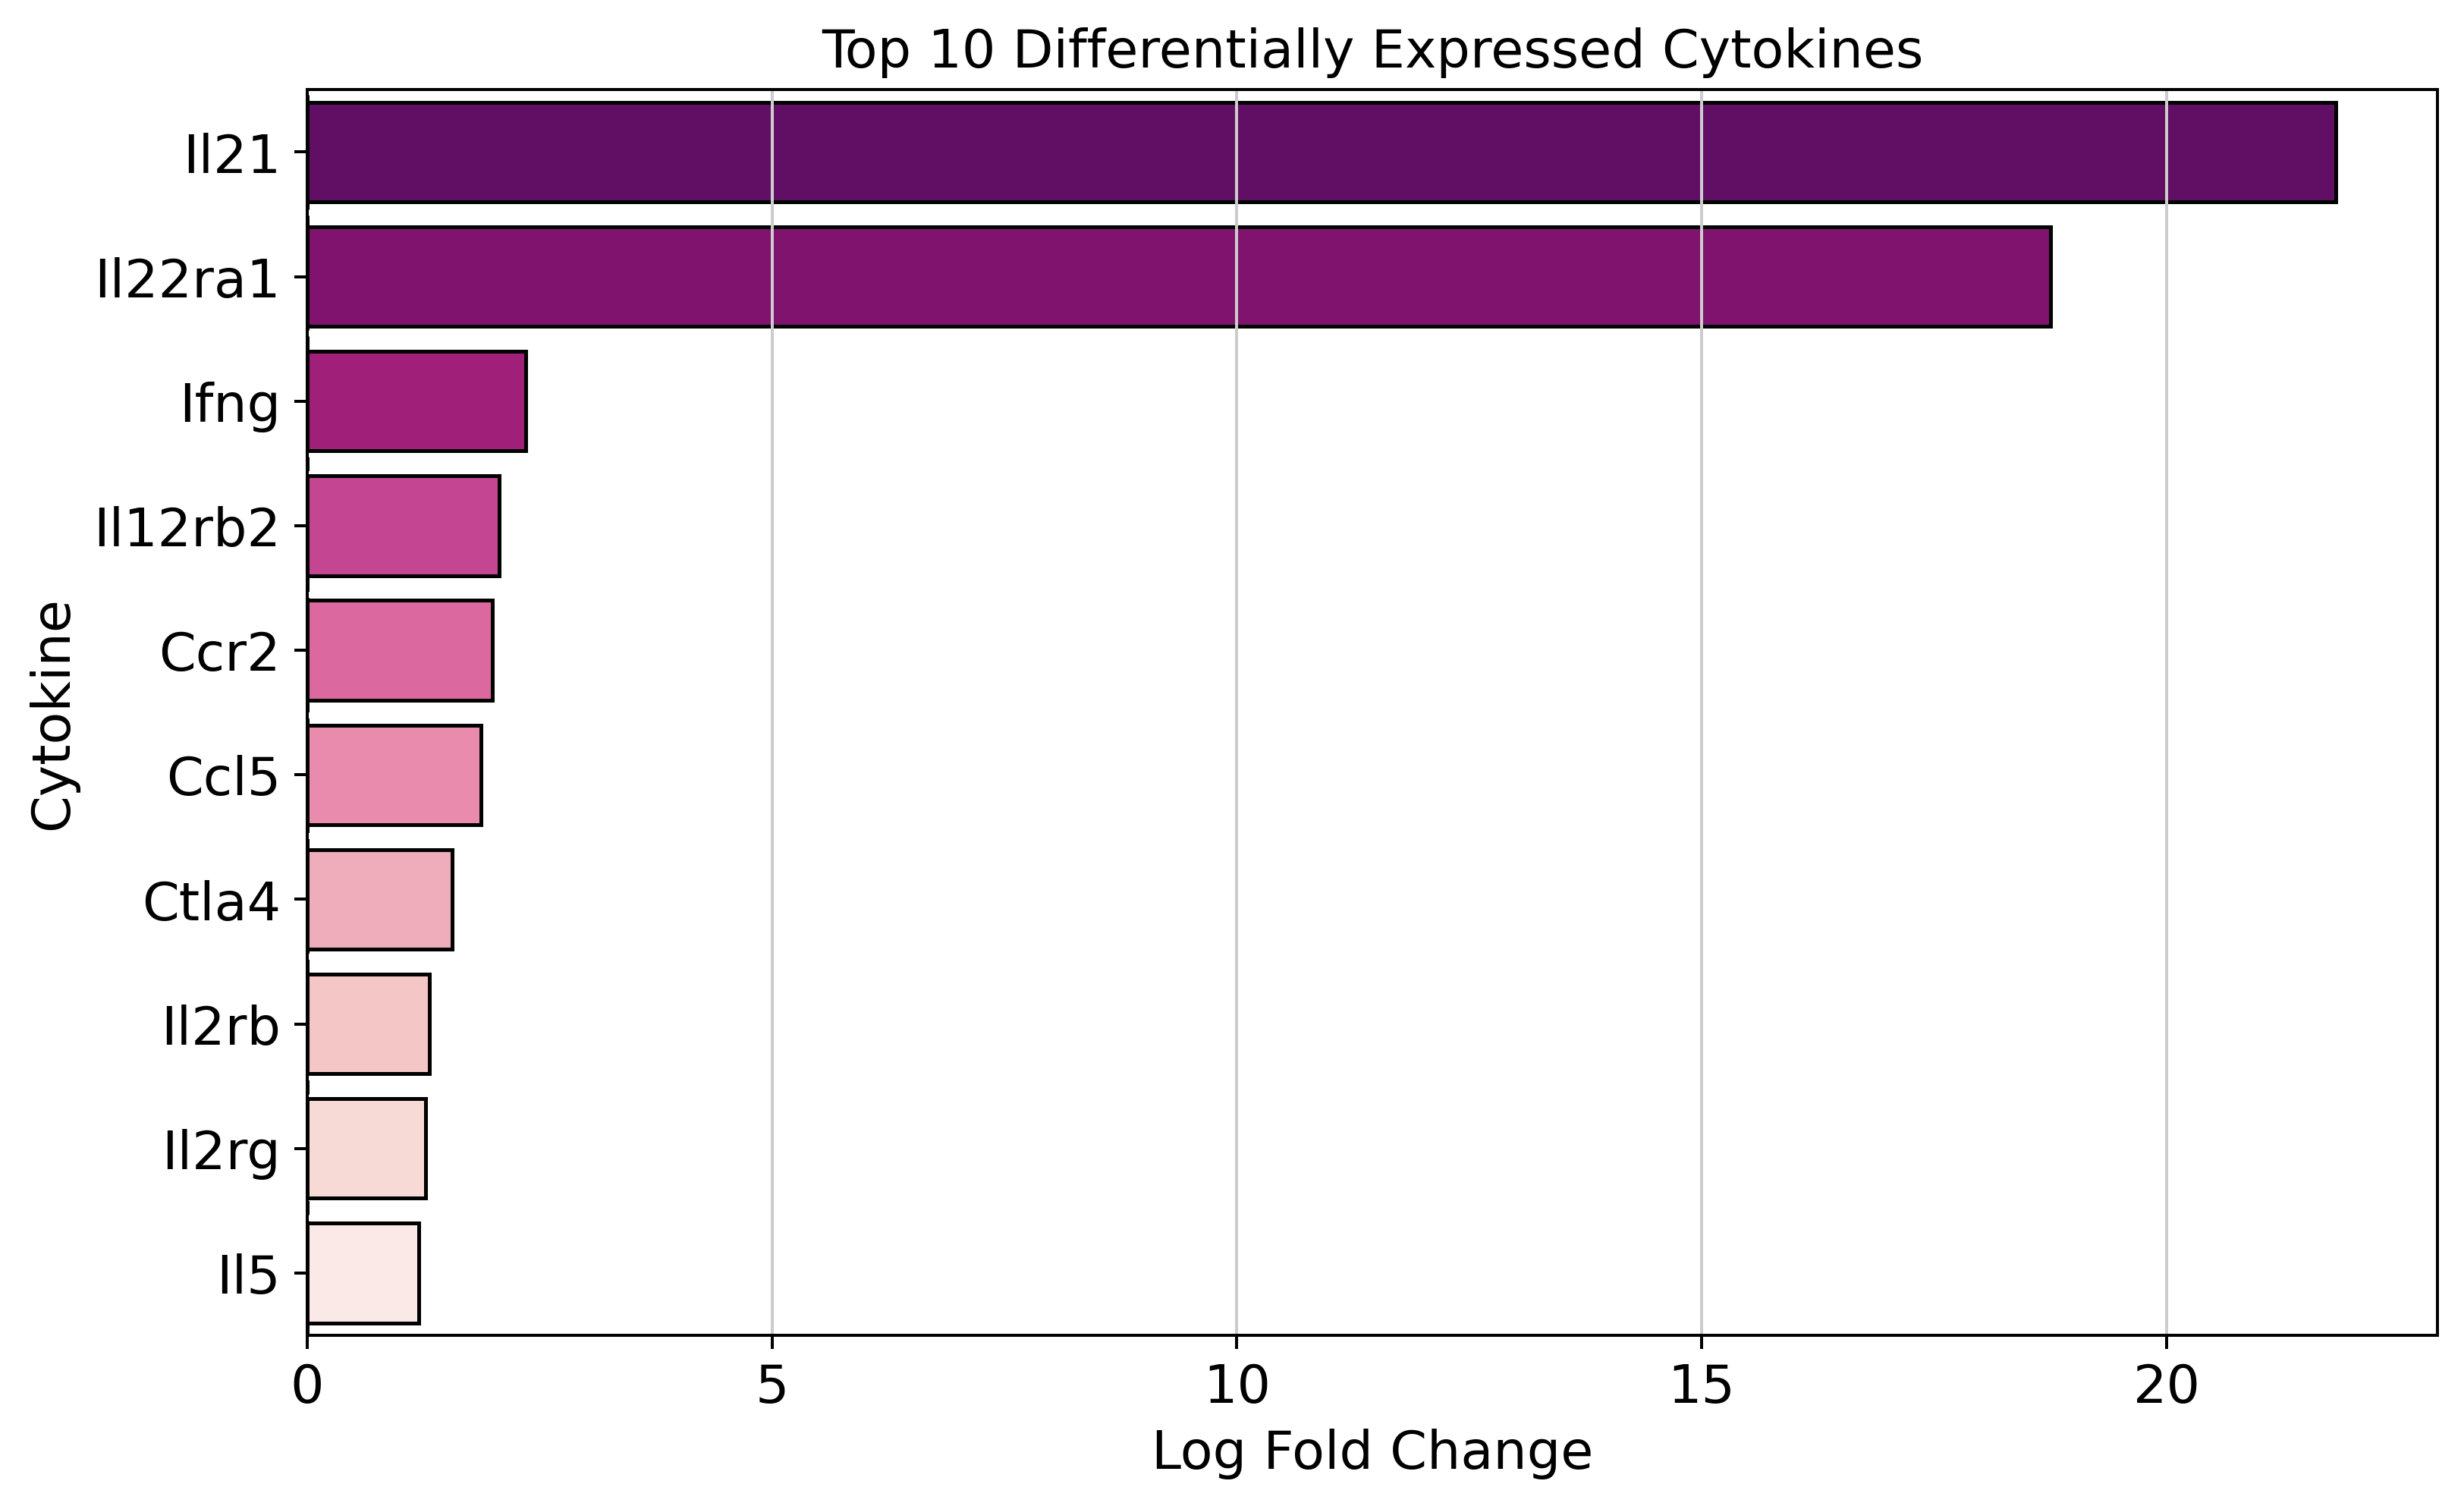

In [174]:
#### Barplot
top_n = 10  # Number of top cytokines to plot
top_cytokines = cytokine_diff_expr_sorted.head(top_n)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='logfoldchanges', 
    y='gene', 
    data=top_cytokines, 
    palette='RdPu' if top_cytokines['logfoldchanges'].min() < 0 else 'RdPu_r',
    edgecolor='black')

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title(f'Top {top_n} Differentially Expressed Cytokines')
plt.xlabel('Log Fold Change')
plt.ylabel('Cytokine')
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-Ctr-noninf_Barplot.png')
plt.show()

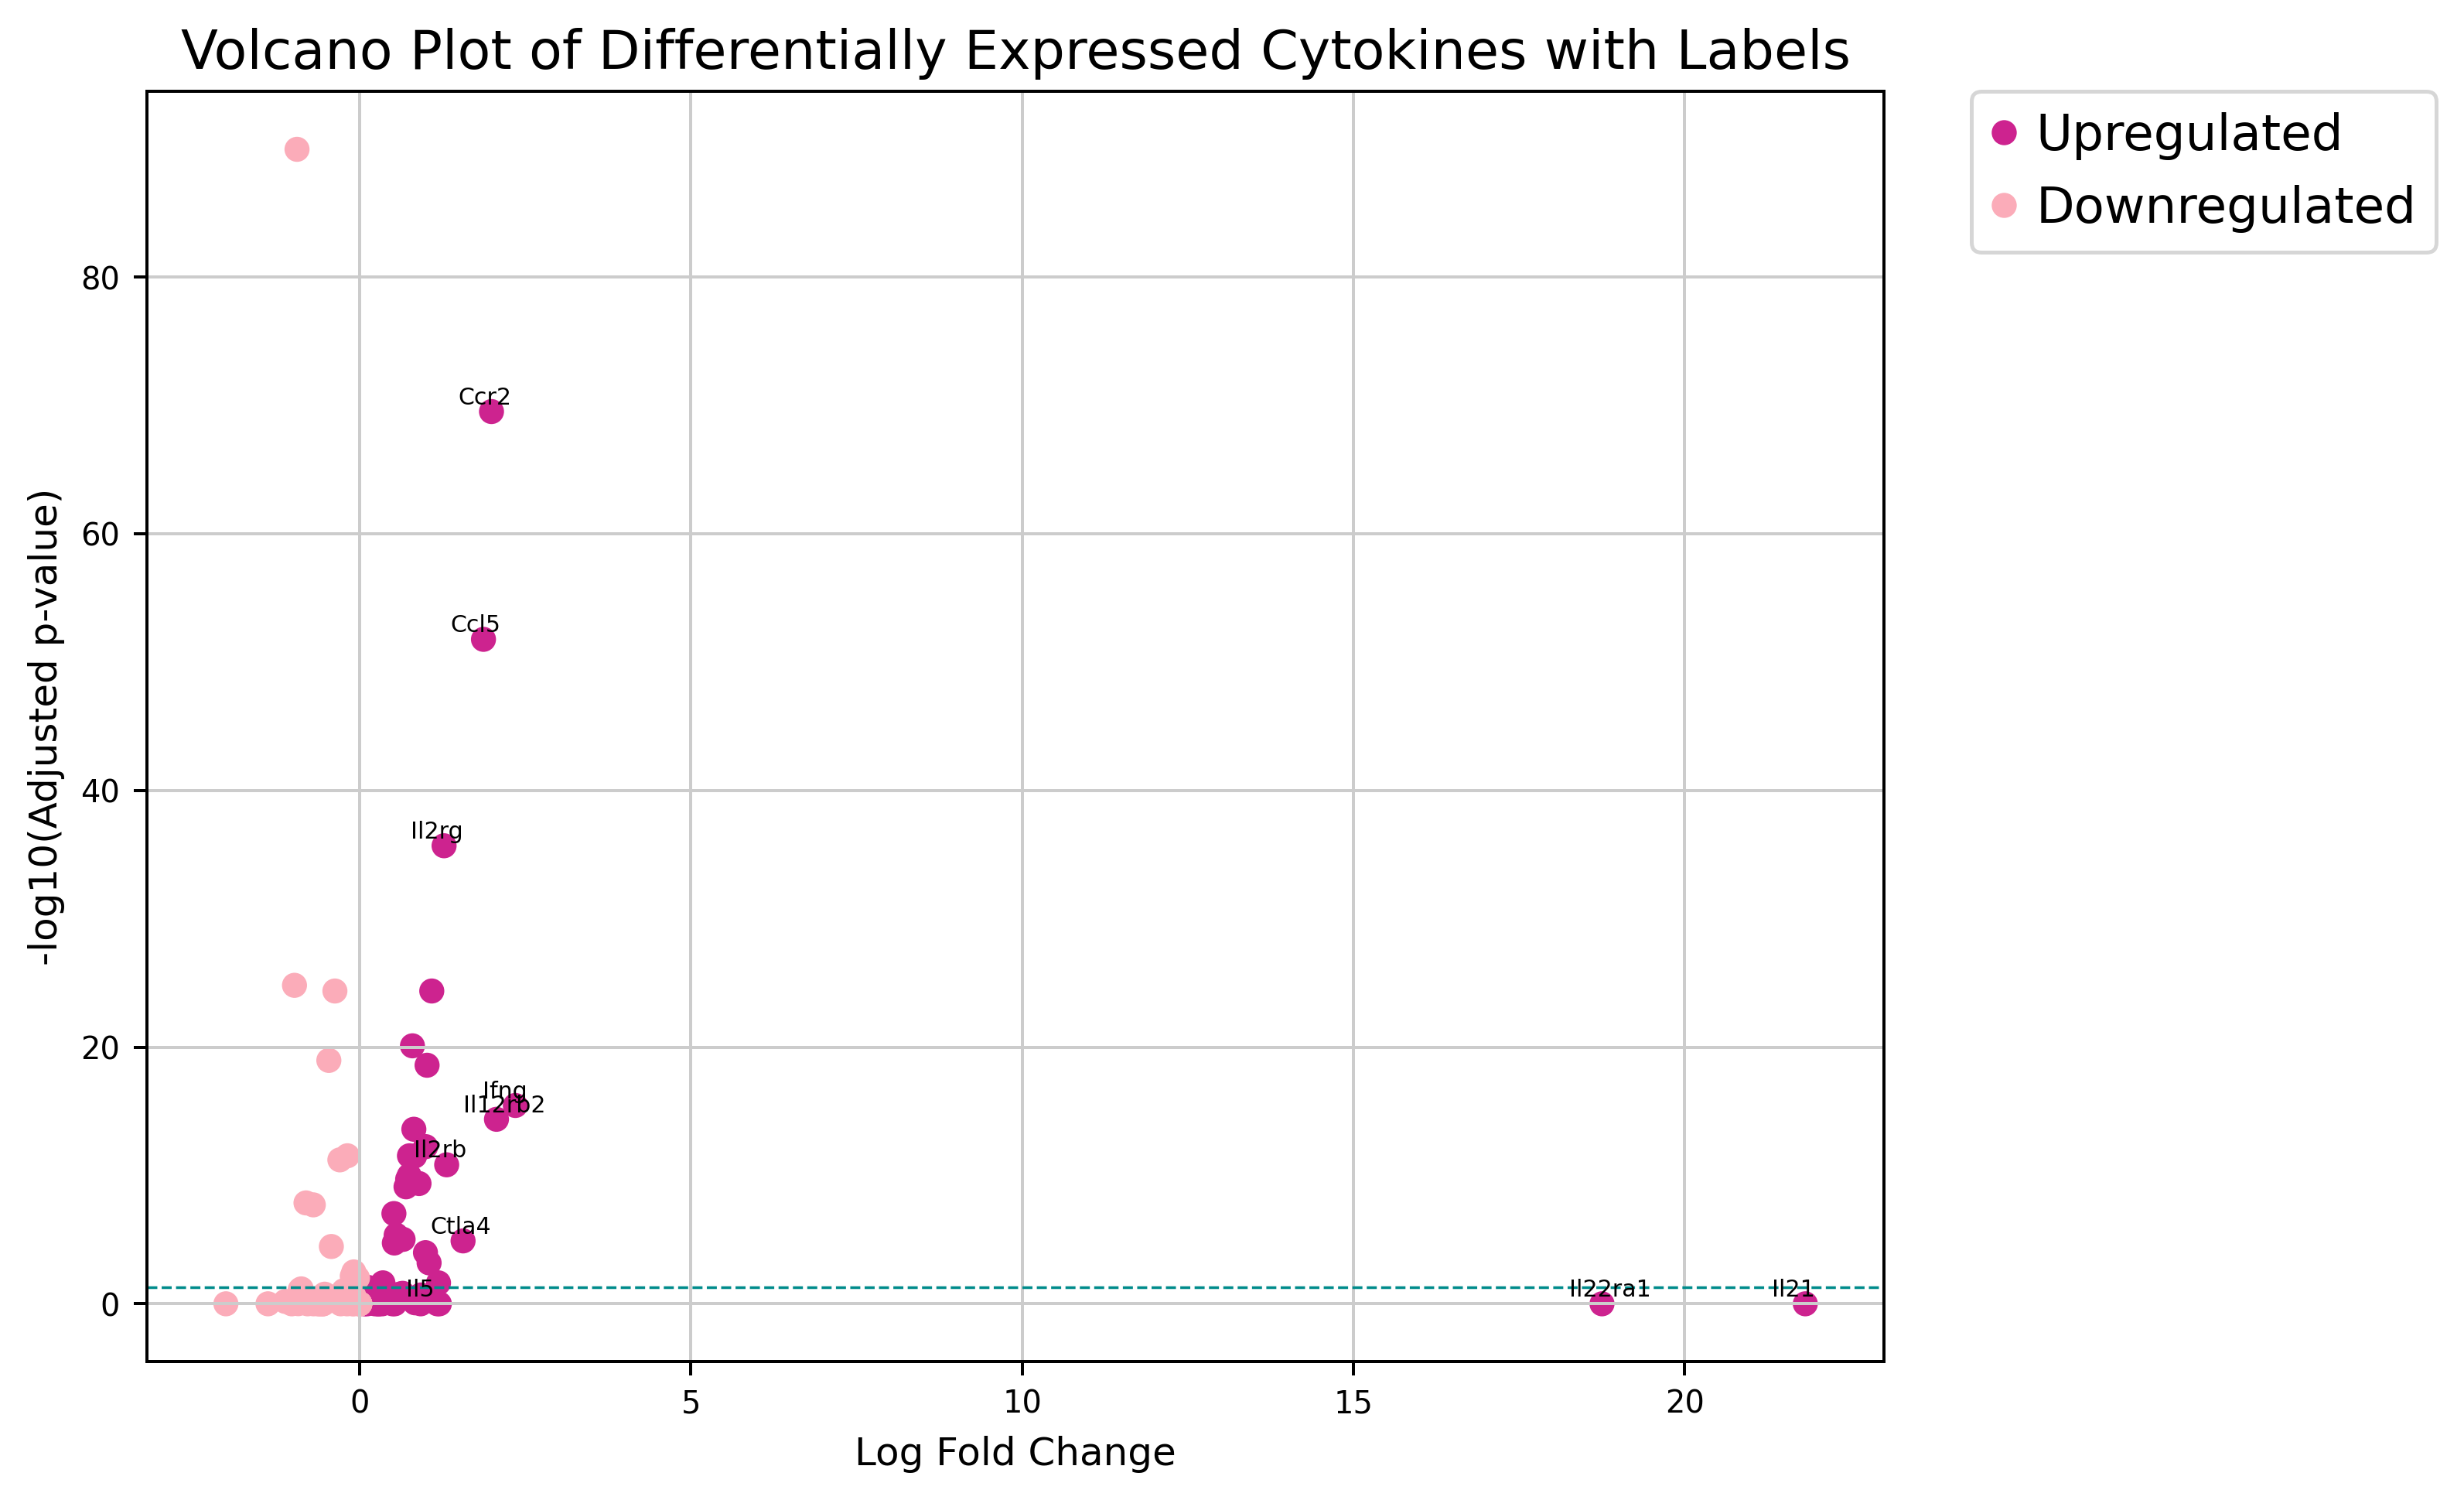

In [175]:
#### Volcano Plot
cytokine_diff_expr_sorted['regulation'] = ['Upregulated' if x > 0 else 'Downregulated' for x in cytokine_diff_expr_sorted['logfoldchanges']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='logfoldchanges', 
    y=-np.log10(cytokine_diff_expr_sorted['pvals_adj']), 
    data=cytokine_diff_expr_sorted,
    hue='regulation', 
    palette='RdPu_r',    
    edgecolor=None)

plt.axhline(-np.log10(0.05), linestyle='--', color='darkcyan', linewidth=0.7)

for i in range(top_n):
    plt.text(
        x=cytokine_diff_expr_sorted.iloc[i]['logfoldchanges'] - 0.5,
        y=-np.log10(cytokine_diff_expr_sorted.iloc[i]['pvals_adj']) + 0.6,  
        s=cytokine_diff_expr_sorted.iloc[i]['gene'],
        fontsize=6)

plt.title('Volcano Plot of Differentially Expressed Cytokines with Labels')
plt.xlabel('Log Fold Change', fontsize=10)
plt.ylabel('-log10(Adjusted p-value)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-Ctr-noninf_VolcanoPlot.png')
plt.show()

#### Pkp2_hetko_MCMV vs. Pkp2_Ctr_MCMV

In [176]:
condition_of_interest = "Pkp2_HetKO_MCMV"  
reference_condition = "Pkp2_Ctr_MCMV"     

subset_adata = cytokine_adata[cytokine_adata.obs['condition'].isin([condition_of_interest, reference_condition])]
subset_adata
sc.tl.rank_genes_groups(subset_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
diff_expr_results = subset_adata.uns['rank_genes_groups']
genes_df = pd.DataFrame({
    'gene': diff_expr_results['names'][condition_of_interest],
    'logfoldchanges': diff_expr_results['logfoldchanges'][condition_of_interest],
    'pvals': diff_expr_results['pvals'][condition_of_interest],
    'pvals_adj': diff_expr_results['pvals_adj'][condition_of_interest]})

cytokine_diff_expr = genes_df[genes_df['gene'].isin(cytokine_genes)]
cytokine_diff_expr_sorted = cytokine_diff_expr.sort_values(by='logfoldchanges', ascending=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/tmp/ipykernel_1355311/1032499831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


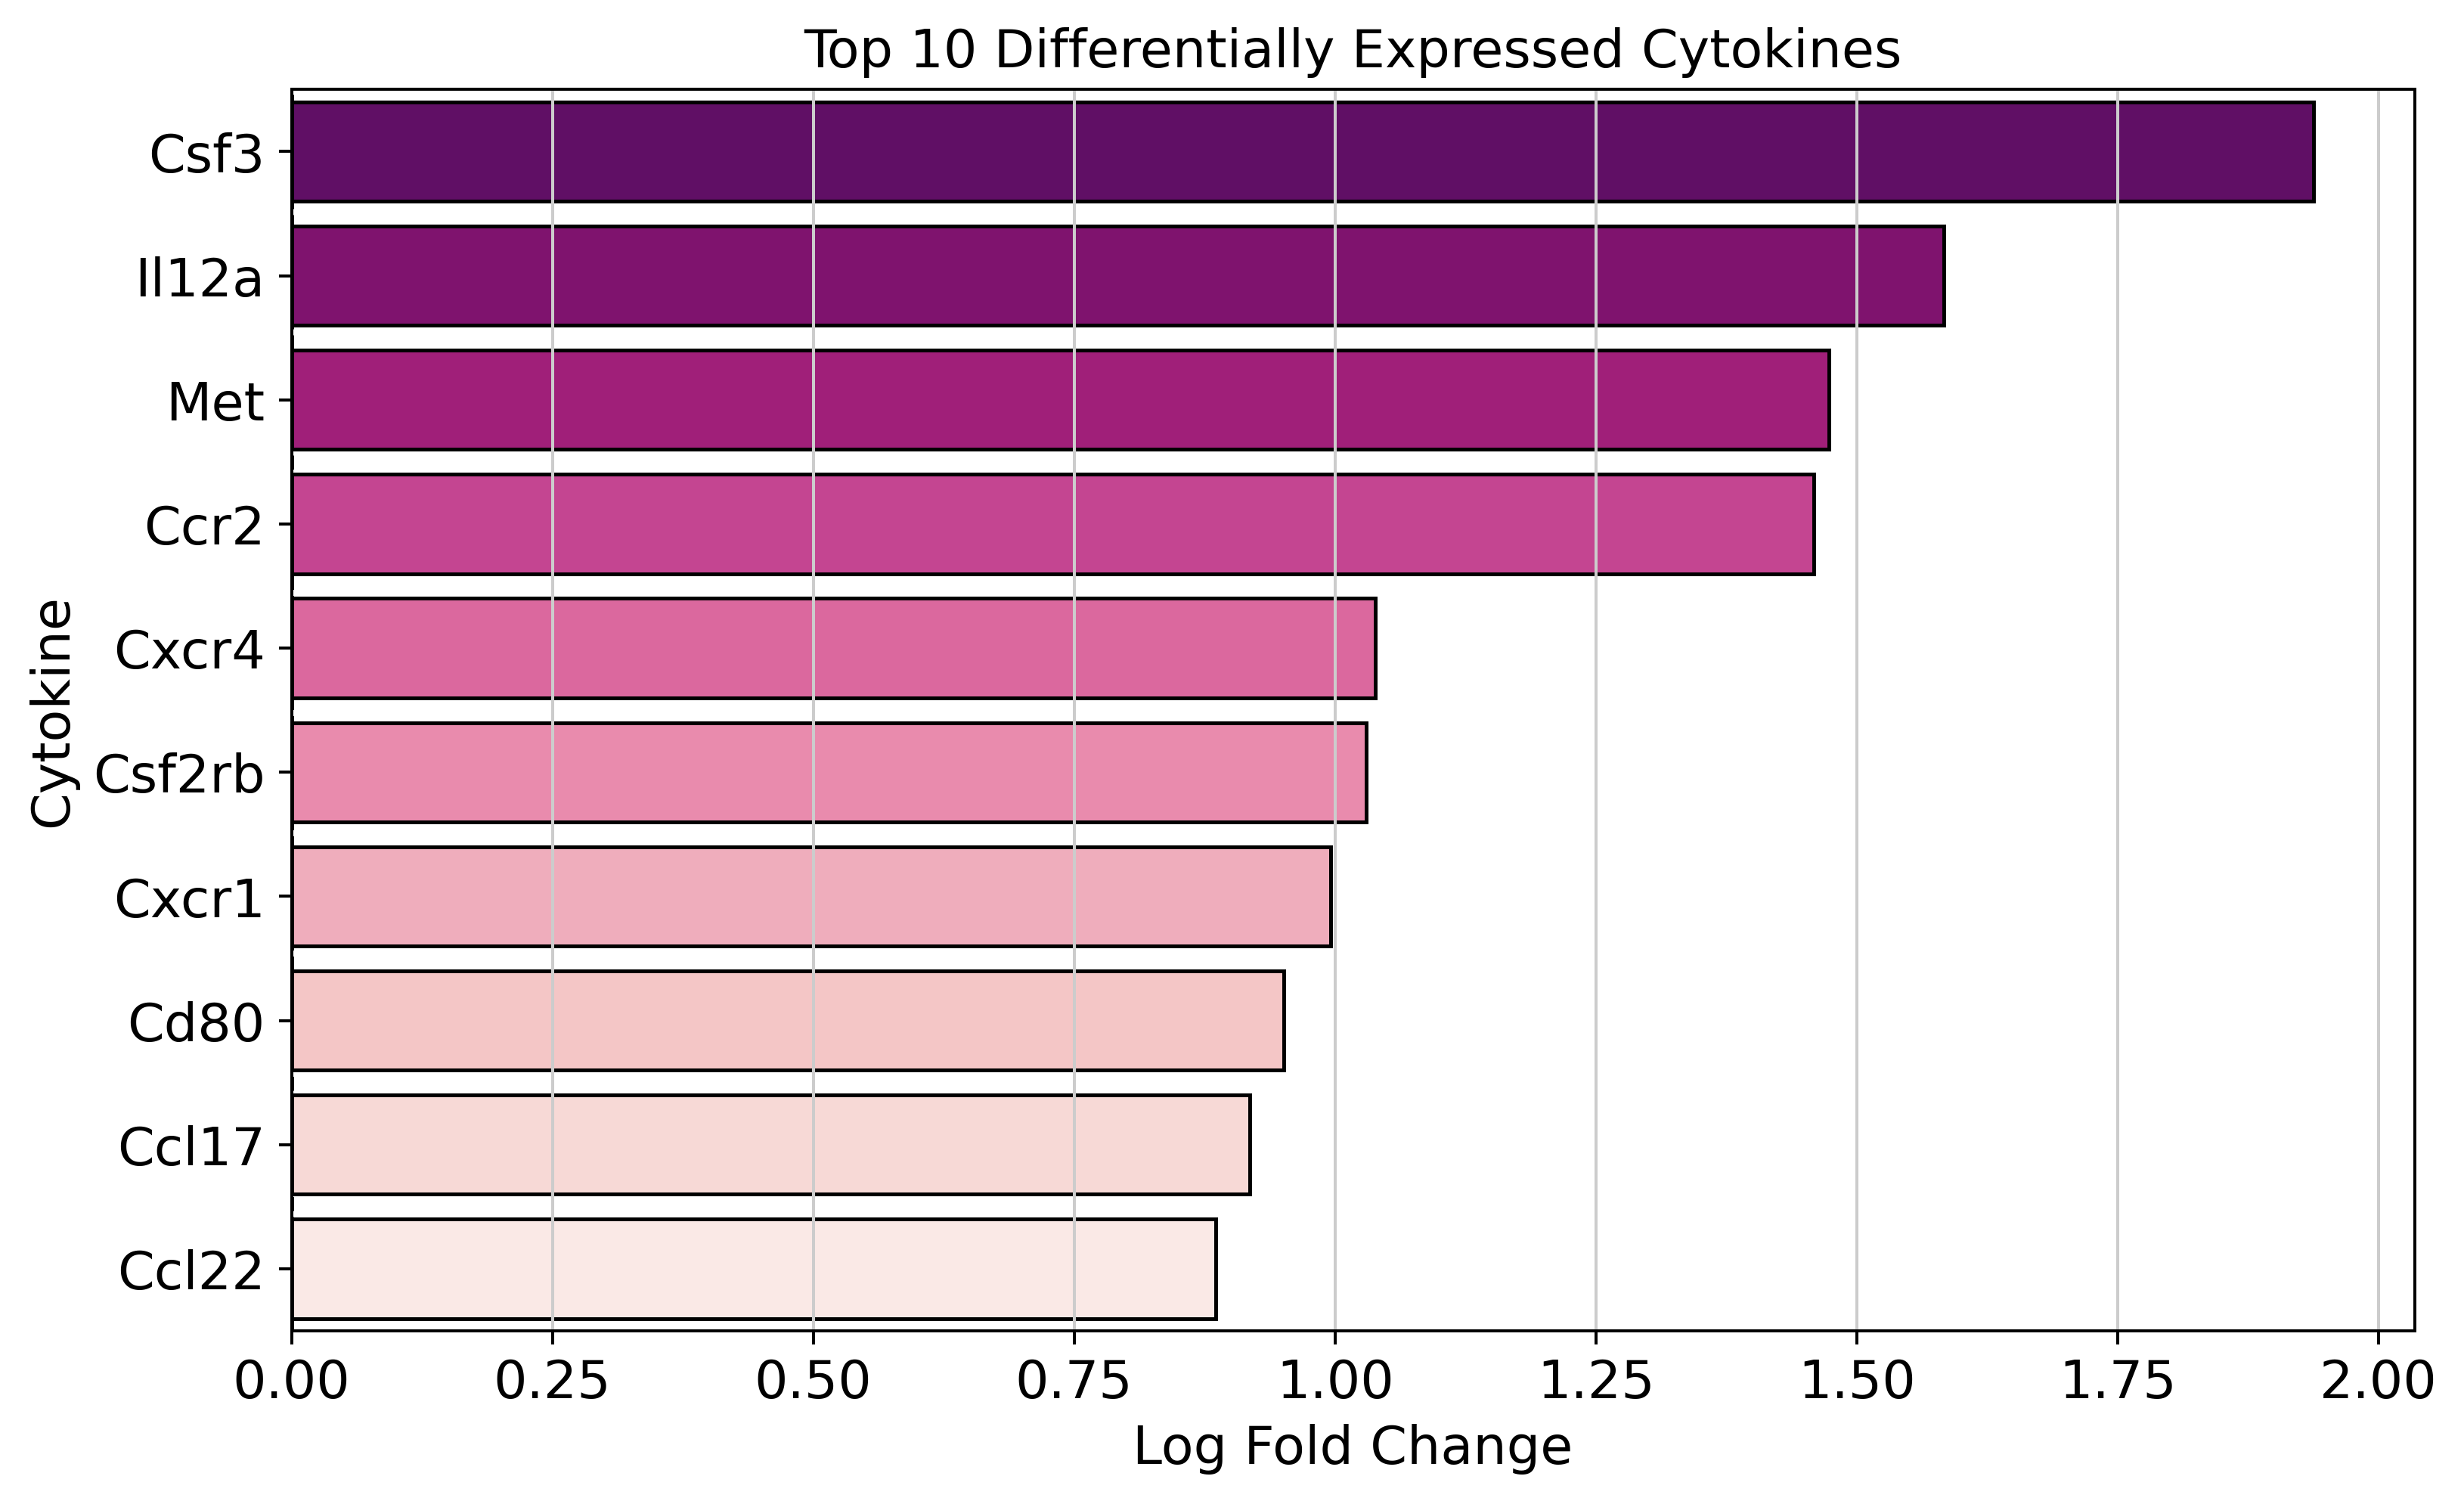

In [177]:
#### Barplot
top_n = 10  # Number of top cytokines to plot
top_cytokines = cytokine_diff_expr_sorted.head(top_n)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='logfoldchanges', 
    y='gene', 
    data=top_cytokines, 
    palette='RdPu' if top_cytokines['logfoldchanges'].min() < 0 else 'RdPu_r',
    edgecolor='black')

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title(f'Top {top_n} Differentially Expressed Cytokines')
plt.xlabel('Log Fold Change')
plt.ylabel('Cytokine')
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-Ctr-MCMV_Barplot.png')
plt.show()

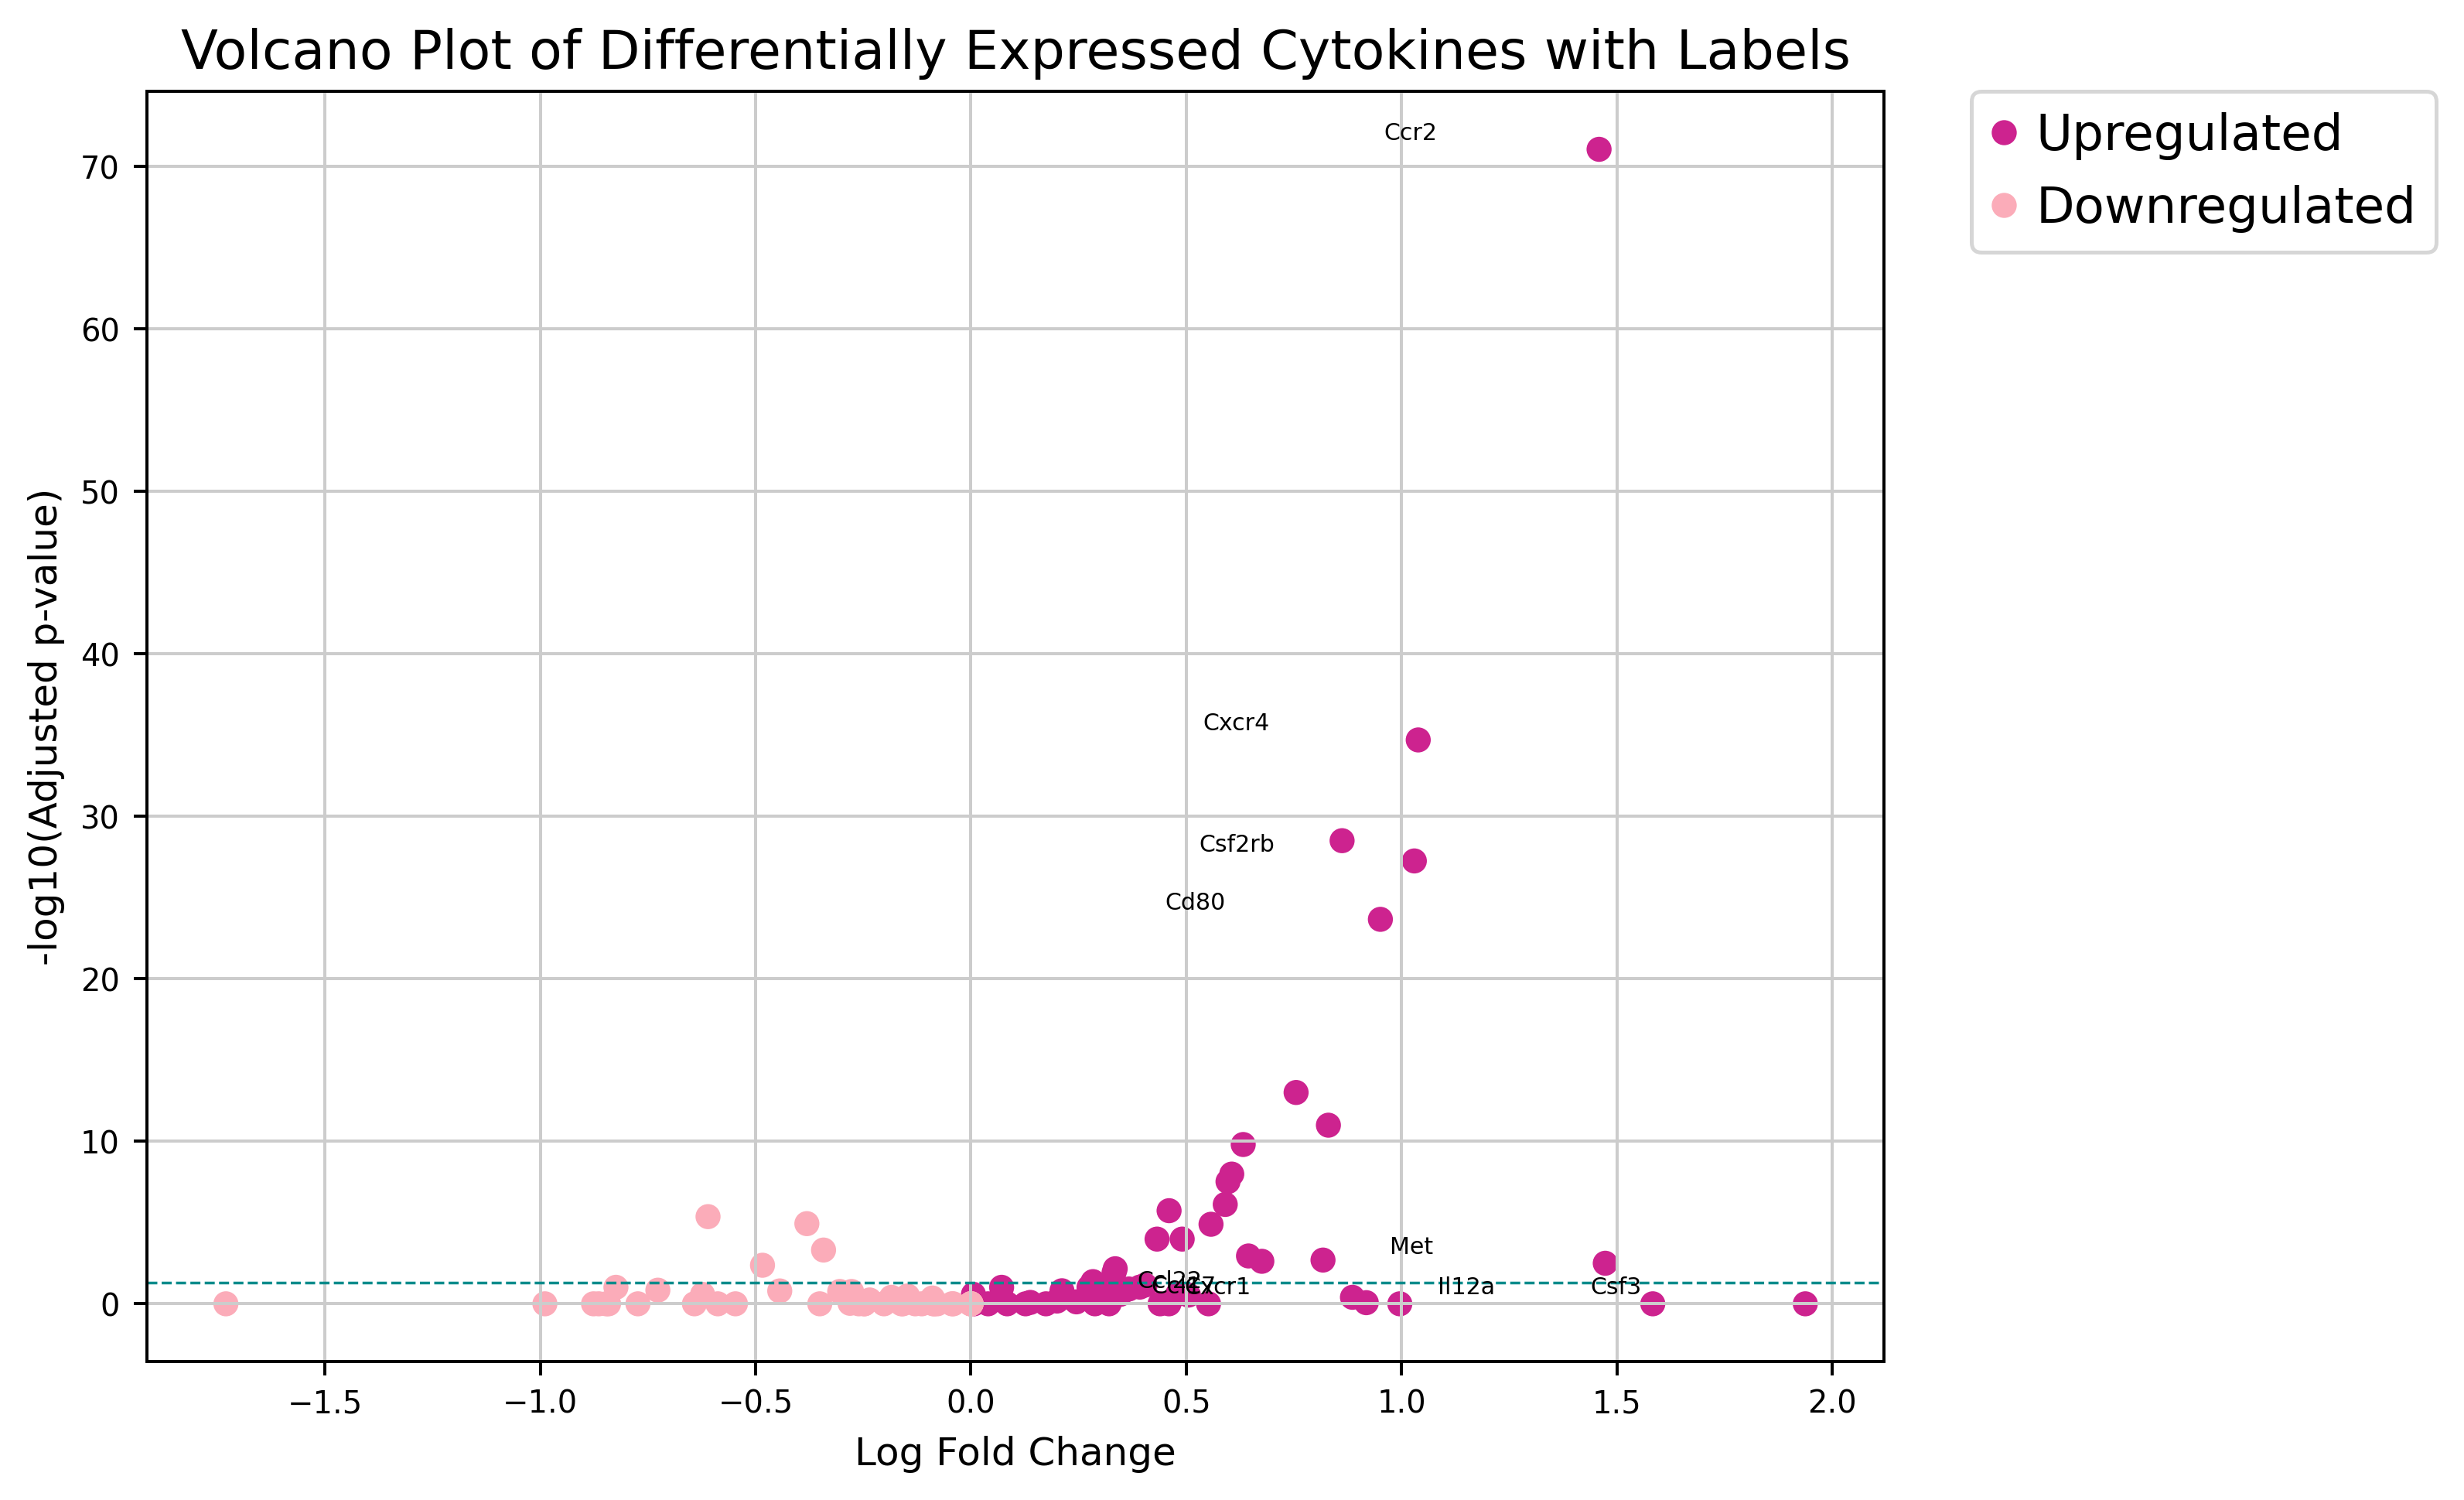

In [178]:
#### Volcano Plot
cytokine_diff_expr_sorted['regulation'] = ['Upregulated' if x > 0 else 'Downregulated' for x in cytokine_diff_expr_sorted['logfoldchanges']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='logfoldchanges', 
    y=-np.log10(cytokine_diff_expr_sorted['pvals_adj']), 
    data=cytokine_diff_expr_sorted,
    hue='regulation', 
    palette='RdPu_r',    
    edgecolor=None)

plt.axhline(-np.log10(0.05), linestyle='--', color='darkcyan', linewidth=0.7)

for i in range(top_n):
    plt.text(
        x=cytokine_diff_expr_sorted.iloc[i]['logfoldchanges'] - 0.5,
        y=-np.log10(cytokine_diff_expr_sorted.iloc[i]['pvals_adj']) + 0.6,  
        s=cytokine_diff_expr_sorted.iloc[i]['gene'],
        fontsize=6)

plt.title('Volcano Plot of Differentially Expressed Cytokines with Labels')
plt.xlabel('Log Fold Change', fontsize=10)
plt.ylabel('-log10(Adjusted p-value)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-Ctr-MCMV_VolcanoPlot.png')
plt.show()

#### Pkp2_hetko_MCMV vs. Pkp2_hetko_noninf

In [179]:
condition_of_interest = "Pkp2_HetKO_MCMV"  
reference_condition = "Pkp2_HetKO_noninf"     

subset_adata = cytokine_adata[cytokine_adata.obs['condition'].isin([condition_of_interest, reference_condition])]
subset_adata
sc.tl.rank_genes_groups(subset_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
diff_expr_results = subset_adata.uns['rank_genes_groups']
genes_df = pd.DataFrame({
    'gene': diff_expr_results['names'][condition_of_interest],
    'logfoldchanges': diff_expr_results['logfoldchanges'][condition_of_interest],
    'pvals': diff_expr_results['pvals'][condition_of_interest],
    'pvals_adj': diff_expr_results['pvals_adj'][condition_of_interest]})

cytokine_diff_expr = genes_df[genes_df['gene'].isin(cytokine_genes)]
cytokine_diff_expr_sorted = cytokine_diff_expr.sort_values(by='logfoldchanges', ascending=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/tmp/ipykernel_1355311/2827289438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


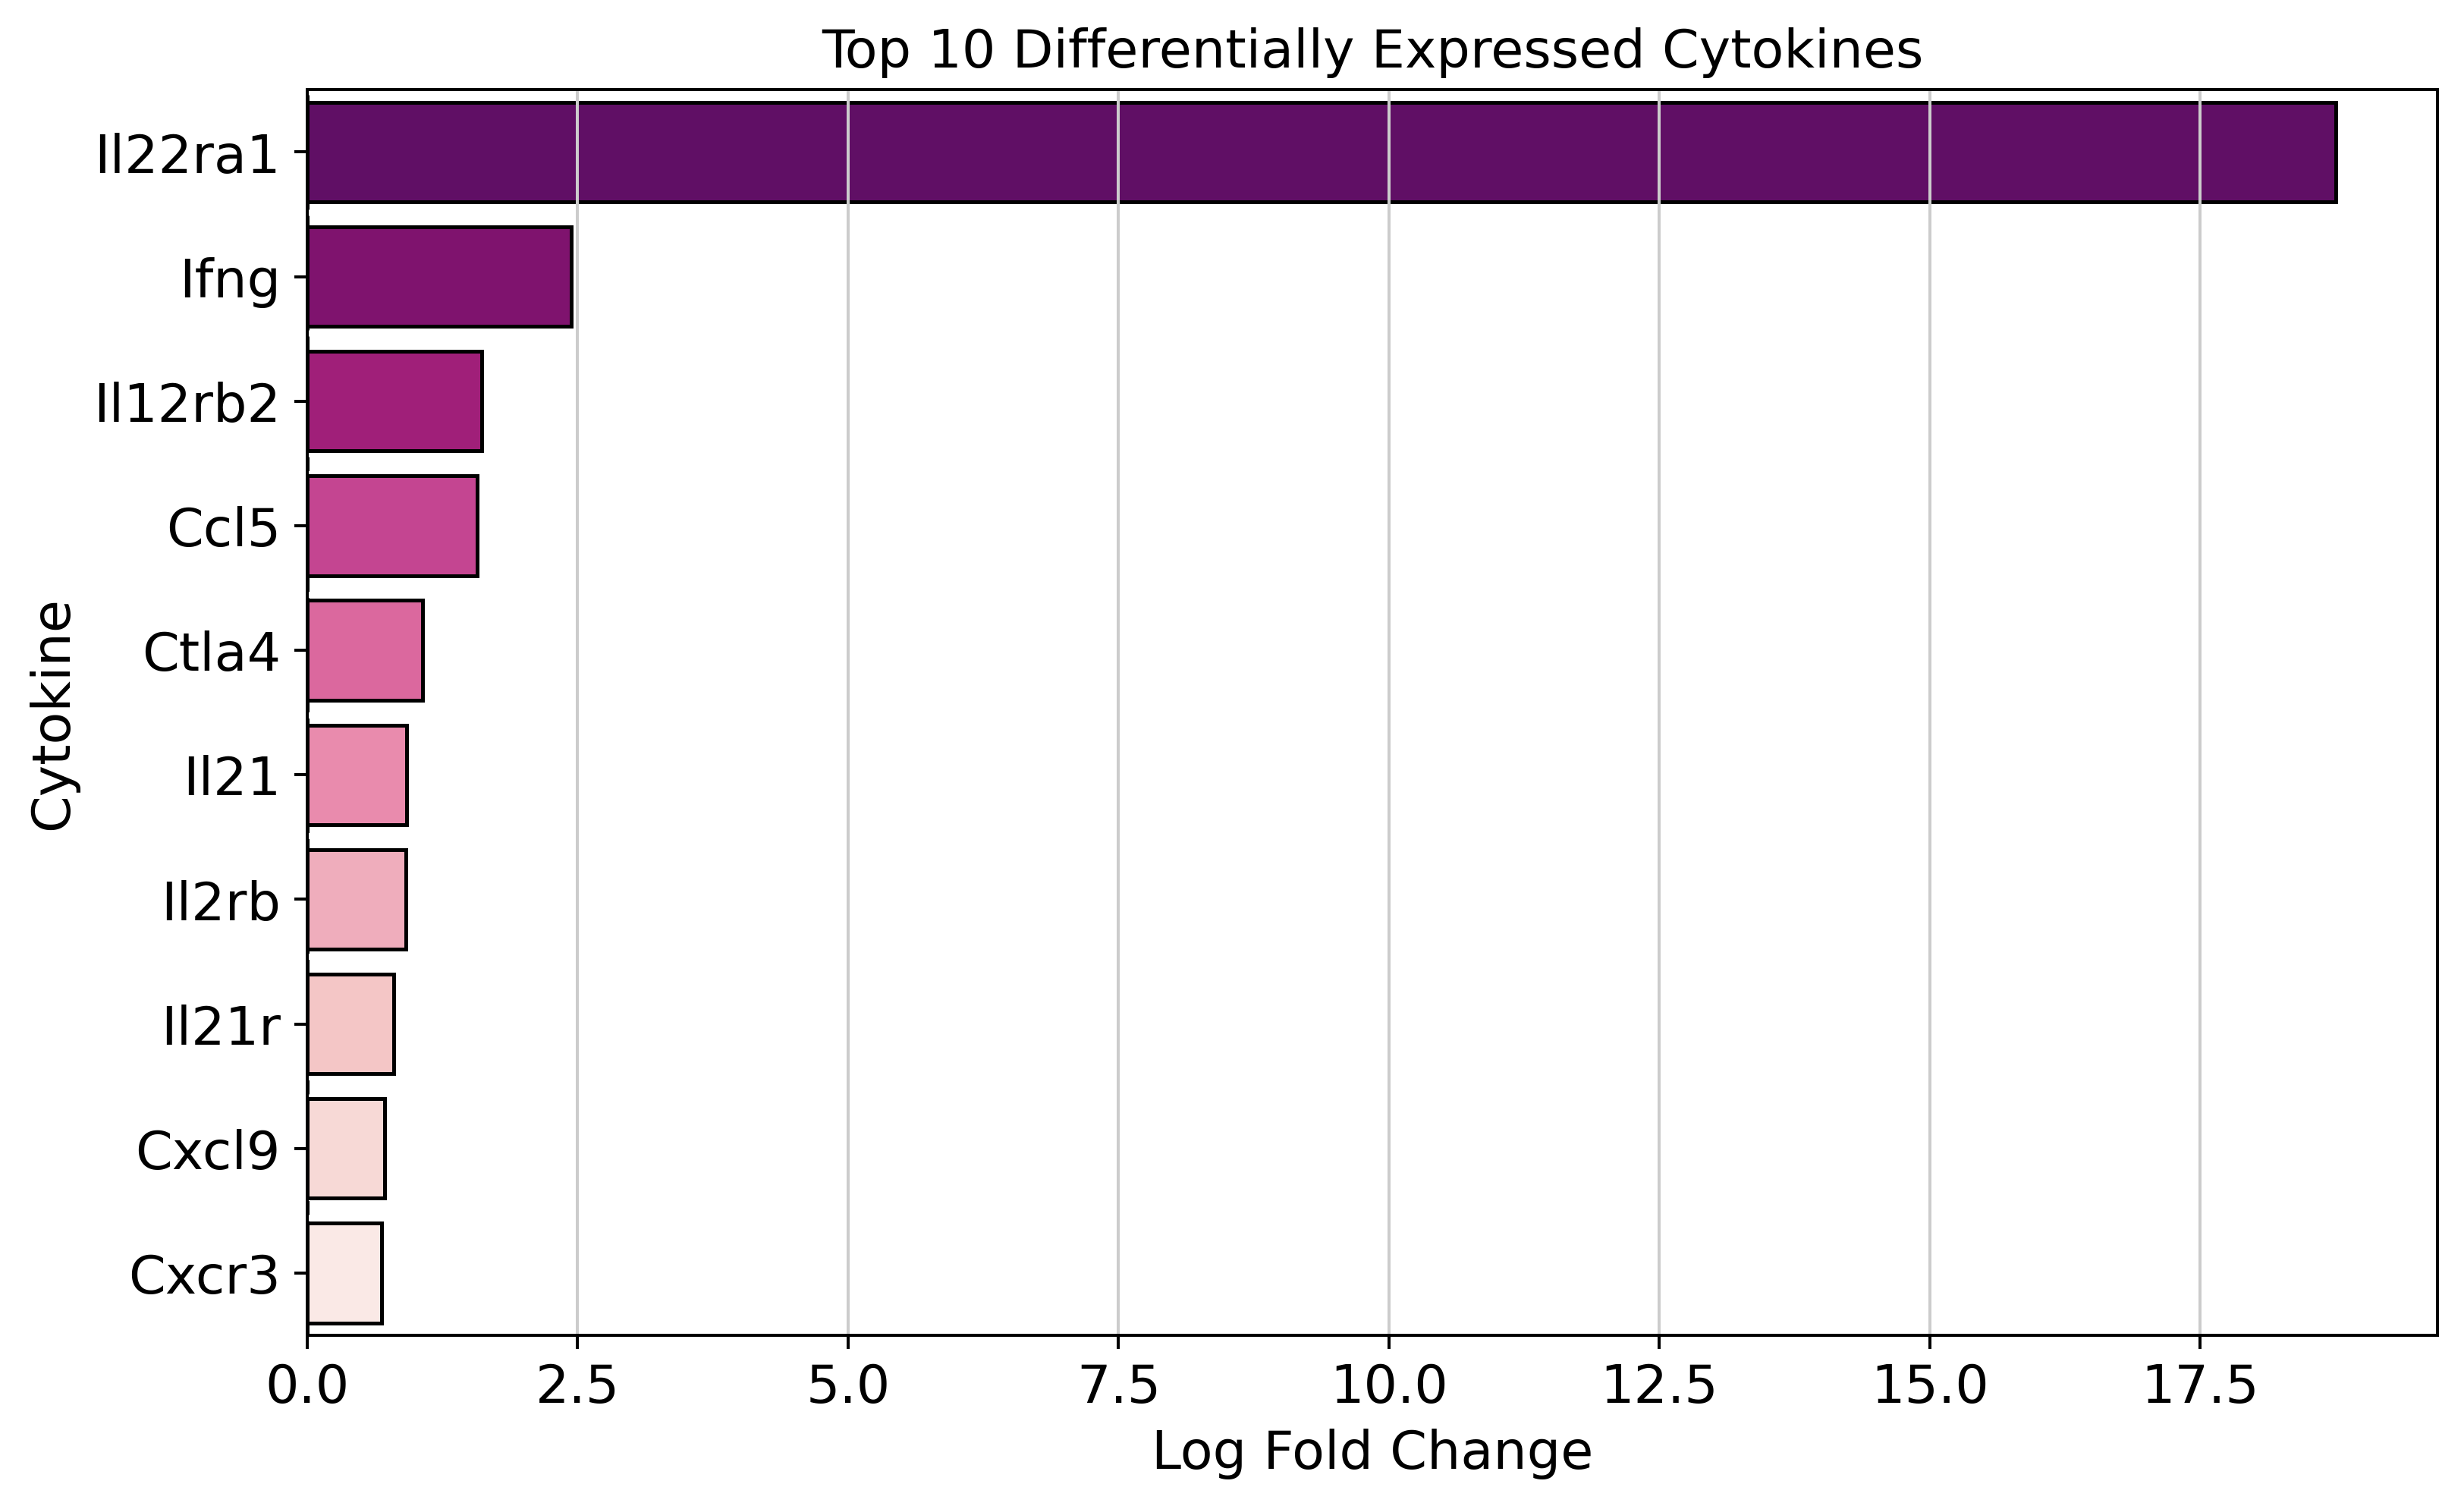

In [180]:
#### Barplot
top_n = 10  # Number of top cytokines to plot
top_cytokines = cytokine_diff_expr_sorted.head(top_n)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='logfoldchanges', 
    y='gene', 
    data=top_cytokines, 
    palette='RdPu' if top_cytokines['logfoldchanges'].min() < 0 else 'RdPu_r',
    edgecolor='black')

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.title(f'Top {top_n} Differentially Expressed Cytokines')
plt.xlabel('Log Fold Change')
plt.ylabel('Cytokine')
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-hetko-noninf_Barplot.png')
plt.show()

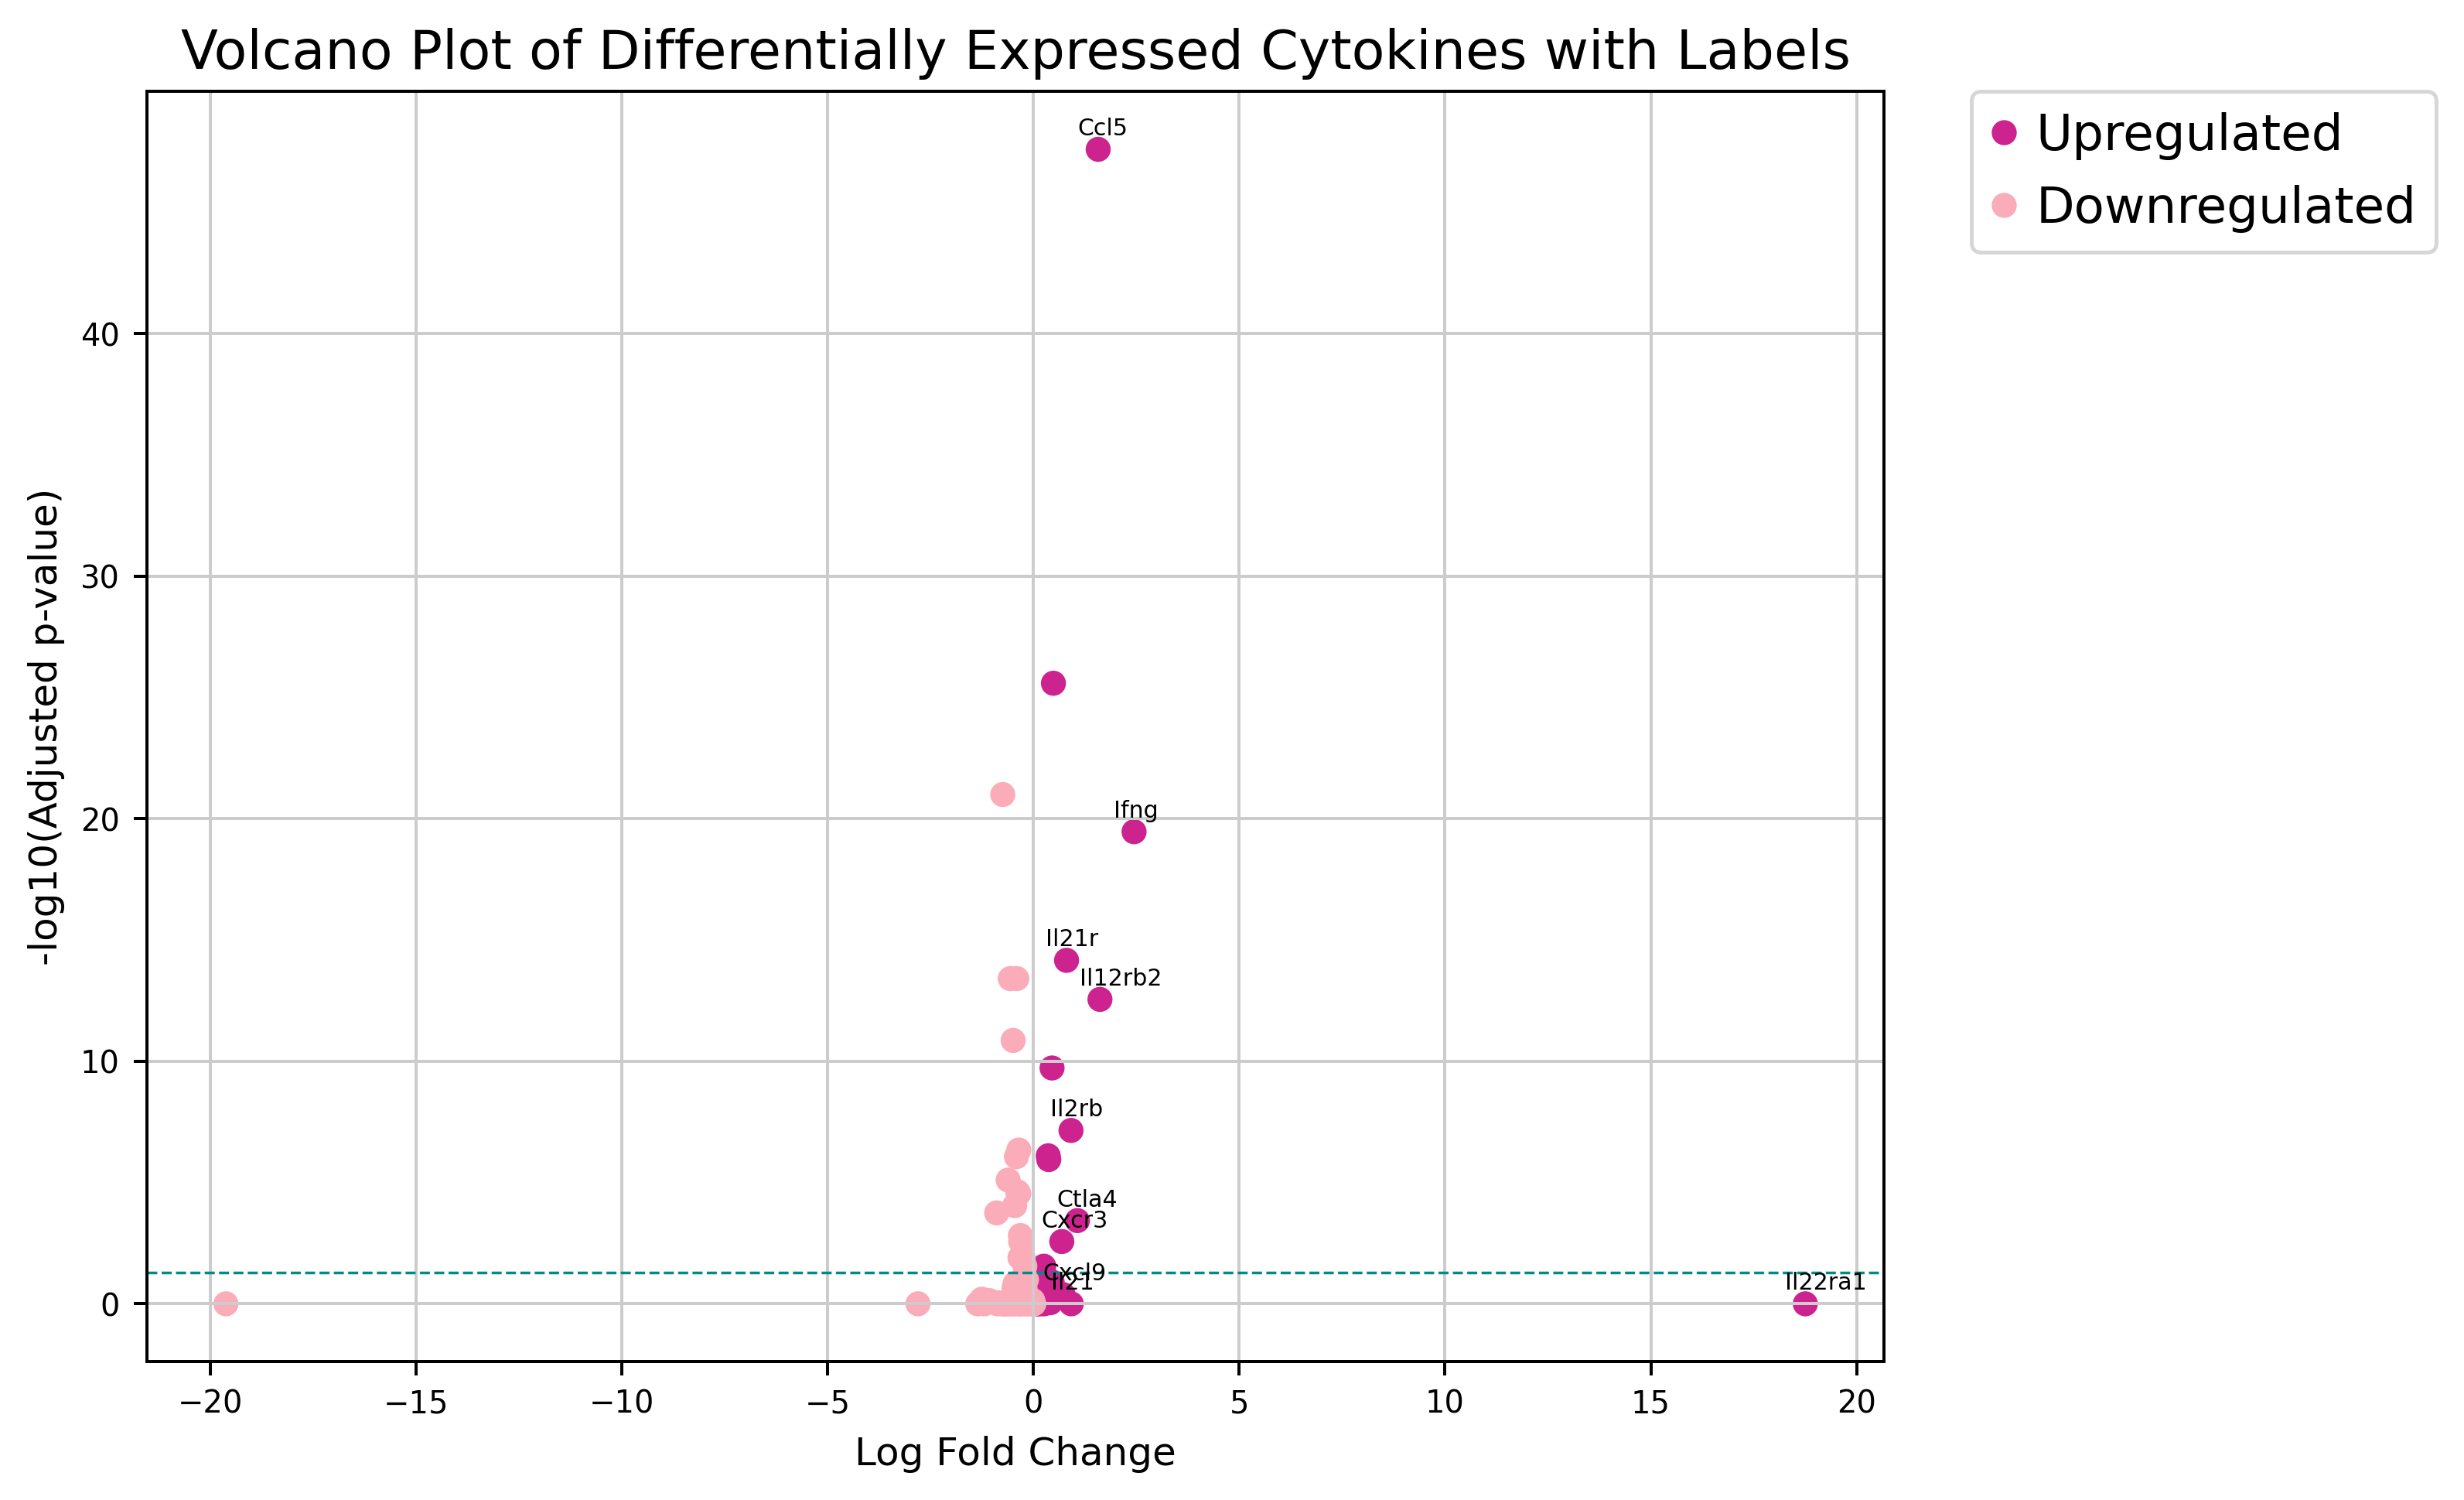

In [181]:
#### Volcano Plot
cytokine_diff_expr_sorted['regulation'] = ['Upregulated' if x > 0 else 'Downregulated' for x in cytokine_diff_expr_sorted['logfoldchanges']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='logfoldchanges', 
    y=-np.log10(cytokine_diff_expr_sorted['pvals_adj']), 
    data=cytokine_diff_expr_sorted,
    hue='regulation', 
    palette='RdPu_r',    
    edgecolor=None)

plt.axhline(-np.log10(0.05), linestyle='--', color='darkcyan', linewidth=0.7)

for i in range(top_n):
    plt.text(
        x=cytokine_diff_expr_sorted.iloc[i]['logfoldchanges'] - 0.5,
        y=-np.log10(cytokine_diff_expr_sorted.iloc[i]['pvals_adj']) + 0.6,  
        s=cytokine_diff_expr_sorted.iloc[i]['gene'],
        fontsize=6)

plt.title('Volcano Plot of Differentially Expressed Cytokines with Labels')
plt.xlabel('Log Fold Change', fontsize=10)
plt.ylabel('-log10(Adjusted p-value)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(f'Top{top_n}_DE_Cytokines_Pkp2-hetko-MCMV_vs_Pkp2-hetko-noninf_VolcanoPlot.png')
plt.show()

#### Comparing multiple Conditions 

In [182]:
conditions_of_interest = ["Pkp2_HetKO_noninf", "Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"] #    , "Ttn_Ctr_noninf", "Ttn_HetKO_noninf", "Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"      
reference_condition = "Pkp2_Ctr_noninf"  

subset_adata = cytokine_adata[cytokine_adata.obs['condition'].isin(conditions_of_interest + [reference_condition])]

In [183]:
results_dict = {}
for condition in conditions_of_interest:
    condition_adata = subset_adata[subset_adata.obs['condition'].isin([condition, reference_condition])]
    
    sc.tl.rank_genes_groups(condition_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
    results_dict[condition] = pd.DataFrame({
        'gene': condition_adata.uns['rank_genes_groups']['names'][condition],
        'logfoldchanges': condition_adata.uns['rank_genes_groups']['logfoldchanges'][condition],
        'pvals': condition_adata.uns['rank_genes_groups']['pvals'][condition],
        'pvals_adj': condition_adata.uns['rank_genes_groups']['pvals_adj'][condition]
    }).set_index('gene')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [184]:
logfc_df = pd.DataFrame(index=cytokine_genes)
for condition, df in results_dict.items():
    logfc_df[condition] = df['logfoldchanges']
logfc_df = logfc_df.loc[cytokine_genes]

#### Barplot of all Cytokines over the conditions of interest

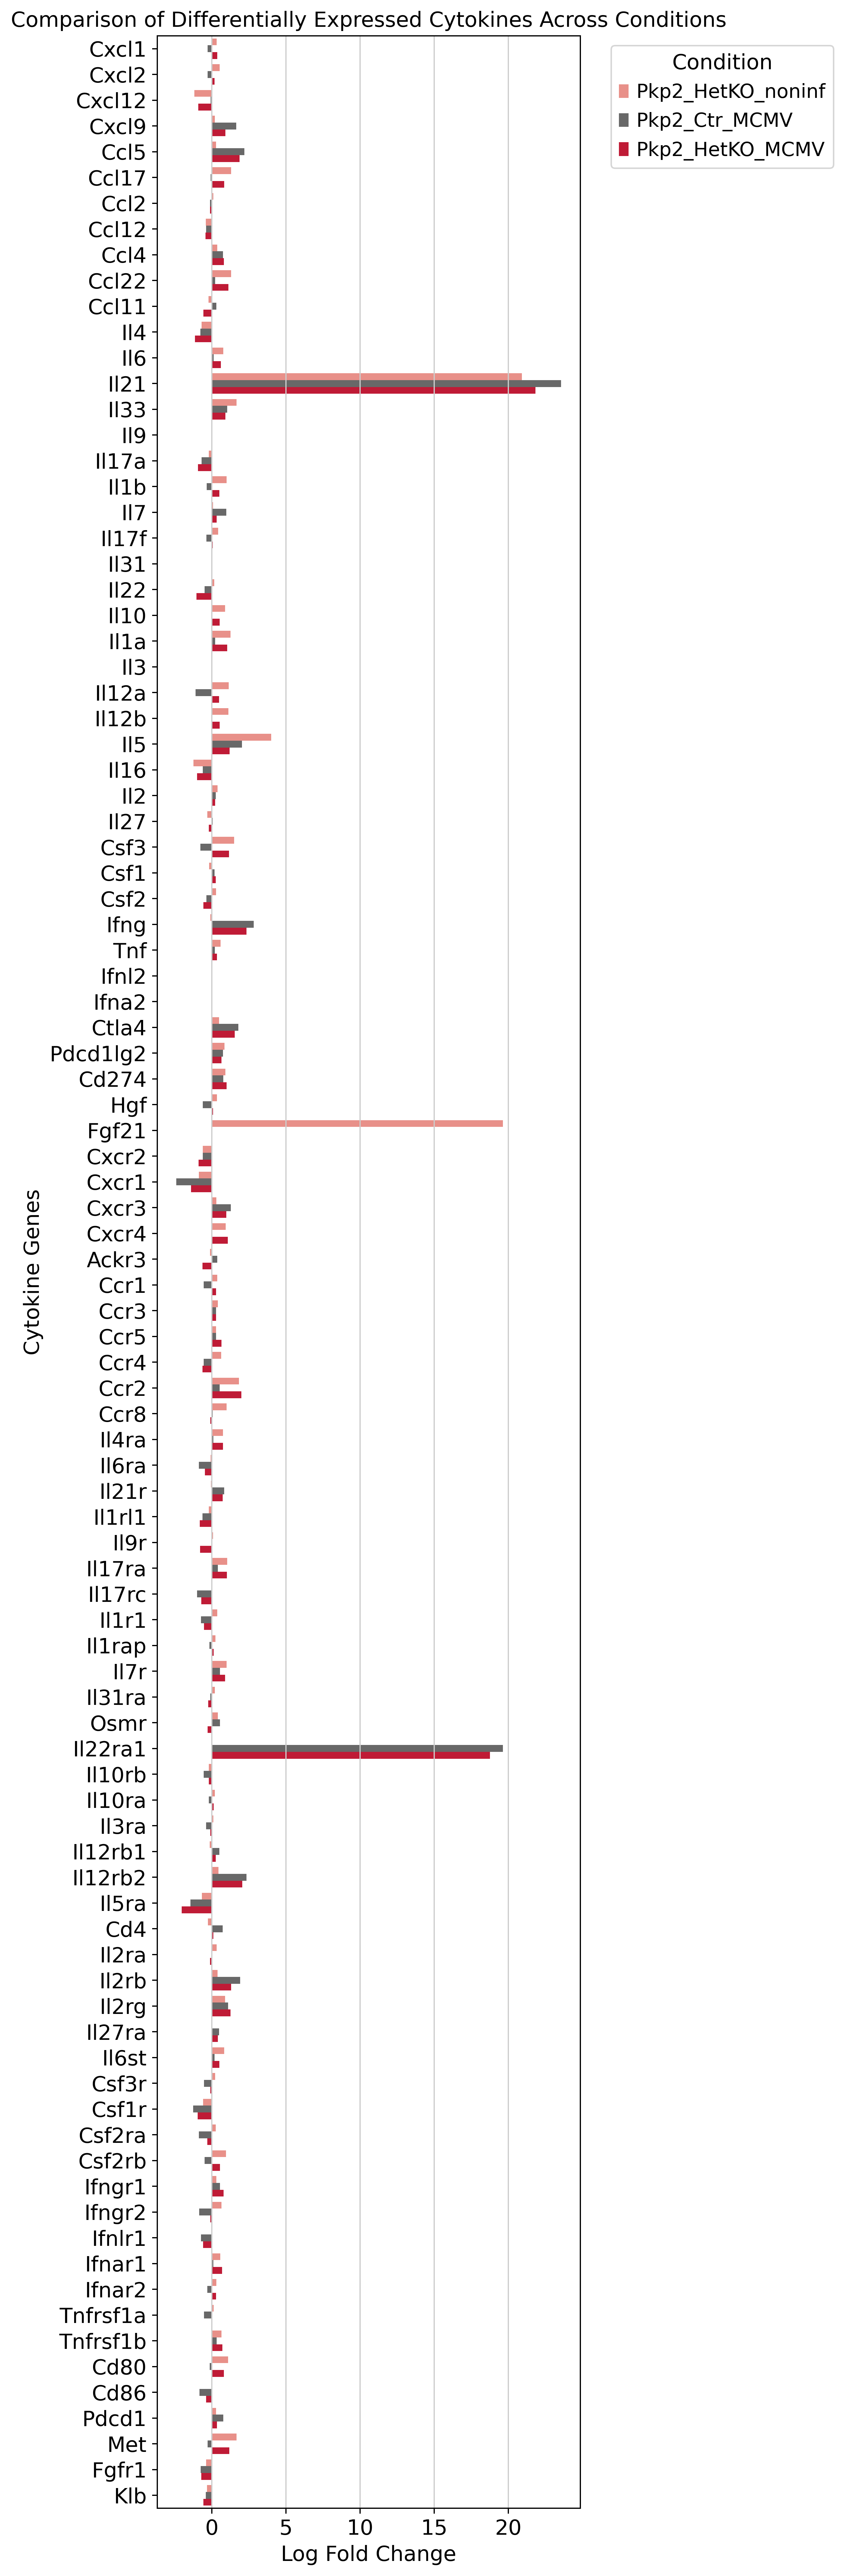

In [185]:
logfc_df_melted = logfc_df.reset_index().melt(id_vars='index', var_name='Condition', value_name='Log Fold Change')

plt.figure(figsize=(5, 30))
sns.barplot(x='Log Fold Change', 
            y='index', 
            hue='Condition', 
            data=logfc_df_melted, 
            palette=condition_colors)

plt.title('Comparison of Differentially Expressed Cytokines Across Conditions')
plt.xlabel('Log Fold Change')
plt.ylabel('Cytokine Genes')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('All_cytokines_in_3_Pkp2_conditions_BarPlot.png')
plt.show()

#### Volcano plot of all Cytokines over the conditions of interest

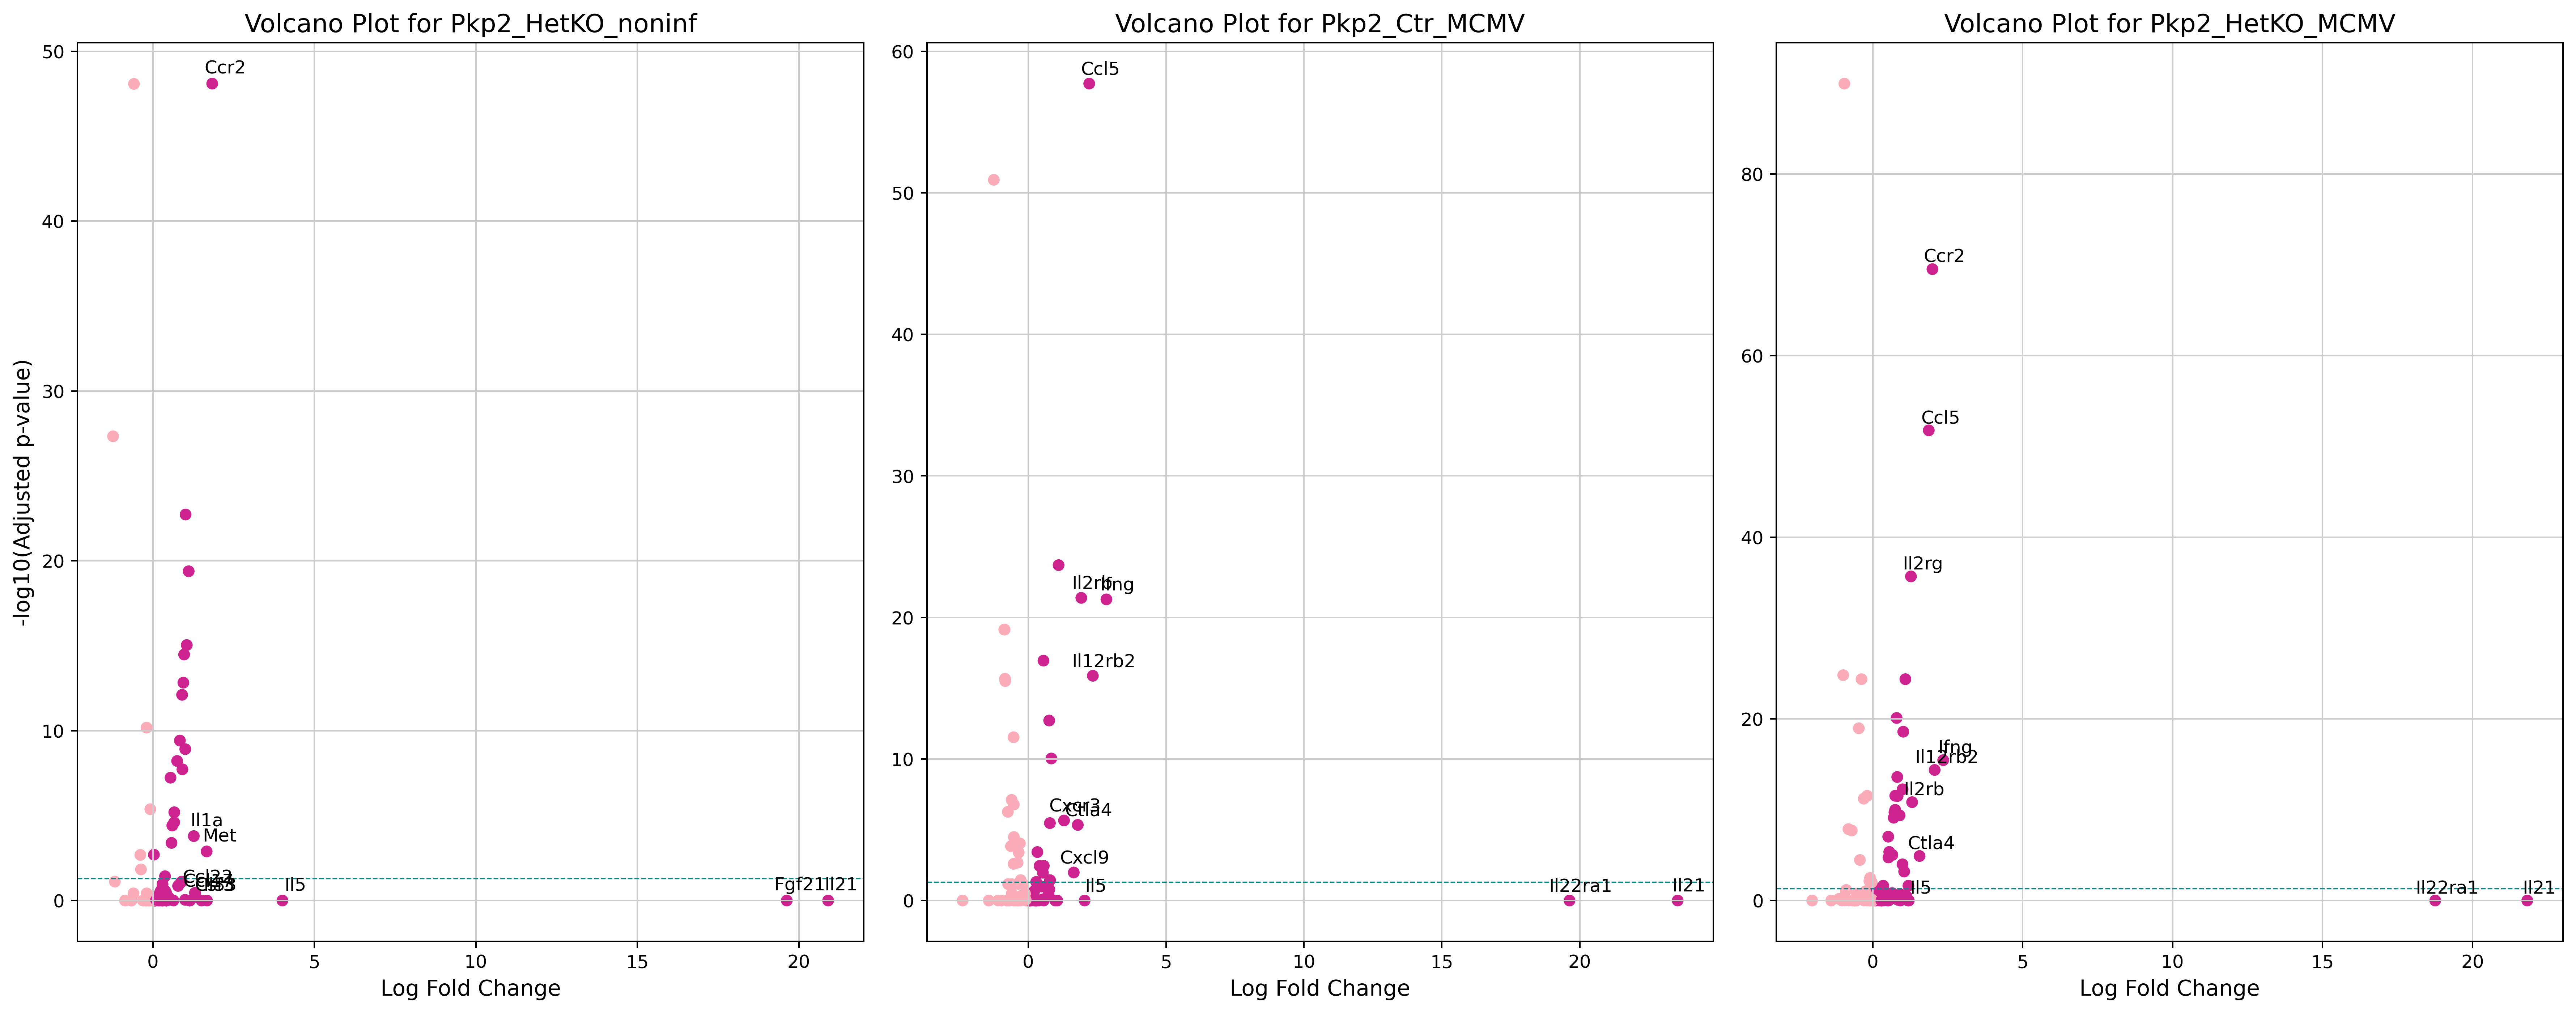

In [186]:
top_n = 10
plt.figure(figsize=(20, 8))

for i, condition in enumerate(conditions_of_interest):
    plt.subplot(1, len(conditions_of_interest), i + 1)

    results_dict[condition]['regulation'] = ['Upregulated' if x > 0 else 'Downregulated' for x in results_dict[condition]['logfoldchanges']]
    
    sns.scatterplot(
        x=results_dict[condition]['logfoldchanges'], 
        y=-np.log10(results_dict[condition]['pvals_adj']), 
        hue='regulation',
        data=results_dict[condition],
        palette='RdPu_r',
        edgecolor=None,
        legend=False)
    
    plt.axhline(-np.log10(0.05), linestyle='--', color='darkcyan', linewidth=0.7)
    
    top_cytokines = results_dict[condition].sort_values(by='logfoldchanges', ascending=False).head(top_n)
    for j in range(top_n):
        plt.text(
            x=top_cytokines['logfoldchanges'].iloc[j] + 0.4,  
            y=-np.log10(top_cytokines['pvals_adj'].iloc[j]) + 0.4,  
            s=top_cytokines.index[j],
            fontsize=10, 
            ha='center',  
            va='bottom')
    
    plt.title(f'Volcano Plot for {condition}', fontsize=14)
    plt.xlabel('Log Fold Change', fontsize=12)
    plt.ylabel('-log10(Adjusted p-value)' if i == 0 else '', fontsize=12)  # Label y-axis only on the first plot
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('All_cytokines_in_3_Pkp2_conditions_VolcanoPlot.png')
plt.show()


#### Barplots for each celltype in the conditions of interest

In [187]:
cell_types = cytokine_adata.obs['annotation'].unique()
conditions_of_interest = ["Pkp2_HetKO_noninf", "Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"] #    , "Ttn_Ctr_noninf", "Ttn_HetKO_noninf", "Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"      
reference_condition = "Pkp2_Ctr_noninf"  

de_results_by_celltype = {}
for cell_type in cell_types:

    cell_type_adata = cytokine_adata[cytokine_adata.obs['annotation'] == cell_type]
    subset_adata = cell_type_adata[cell_type_adata.obs['condition'].isin(conditions_of_interest + [reference_condition])]
    
    cell_type_results = {}
    for condition in conditions_of_interest:
        condition_adata = subset_adata[subset_adata.obs['condition'].isin([condition, reference_condition])]
        
        sc.tl.rank_genes_groups(condition_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
        
        cell_type_results[condition] = pd.DataFrame({
            'gene': condition_adata.uns['rank_genes_groups']['names'][condition],
            'logfoldchanges': condition_adata.uns['rank_genes_groups']['logfoldchanges'][condition],
            'pvals': condition_adata.uns['rank_genes_groups']['pvals'][condition],
            'pvals_adj': condition_adata.uns['rank_genes_groups']['pvals_adj'][condition]
        }).set_index('gene')
    
    de_results_by_celltype[cell_type] = cell_type_results


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be i

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by grou

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be i

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'name

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be i

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to 

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

In [188]:
# Example: Accessing the results for a specific cell type and condition
specific_cell_type = "Neutrophil"  # Replace with your actual cell type
specific_condition = "Pkp2_HetKO_MCMV"  # Replace with your actual condition

results_df = de_results_by_celltype[specific_cell_type][specific_condition]

# Display the top differentially expressed genes
results_df.head(10)


,logfoldchanges,pvals,pvals_adj
gene,,,
Ccl4,0.894735,0.025691,1.0
Ccr1,0.137753,0.110600,1.0
Ccl2,0.768717,0.169383,1.0
Cxcr2,0.024635,0.182355,1.0
Cd80,0.366339,0.218544,1.0
Il6ra,0.266231,0.317464,1.0
Ifnar2,0.303570,0.378558,1.0
Il10ra,0.311033,0.403816,1.0
Cxcr4,0.255489,0.570824,1.0


In [189]:
consolidated_results = []
for cell_type, conditions_dict in de_results_by_celltype.items():
    for condition, df in conditions_dict.items():
        df['cell_type'] = cell_type
        df['condition'] = condition
        consolidated_results.append(df)

results_df = pd.concat(consolidated_results)
results_df.reset_index(inplace=True)
results_df['cell_type'] = results_df['cell_type'].replace({'Tem/Trm-Cd8+': 'Tem_Trm-Cd8+'})

top_n = 10
top_results_df = results_df.groupby(['cell_type', 'condition']).apply(lambda x: x.nlargest(top_n, 'logfoldchanges')).reset_index(drop=True)

/tmp/ipykernel_1355311/2430872264.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_results_df = results_df.groupby(['cell_type', 'condition']).apply(lambda x: x.nlargest(top_n, 'logfoldchanges')).reset_index(drop=True)


In [190]:
cell_types = results_df['cell_type'].unique()
num_cell_types = len(cell_types)

for i, cell_type in enumerate(cell_types):
    plt.figure(figsize=(8, 5))
    cell_type_data = top_results_df[top_results_df['cell_type'] == cell_type]
    
    sns.barplot(
        x='logfoldchanges', 
        y='gene', 
        hue='condition', 
        data=cell_type_data, 
        palette=condition_colors)
    
    plt.title(f'Differential Expression in {cell_type}', fontsize=14)
    plt.xlabel('Log Fold Change', fontsize=12)
    plt.ylabel('Cytokine Genes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'Top{top_n}_DE_Cytokines_3conditions_vs_Pkp2-Ctr-noninf_Barplot_{cell_type}.png', bbox_inches='tight')
    plt.close()

plt.show()

## Include all genes of adata and not only the specific cytokines

In [191]:
cell_types = adata.obs['annotation'].unique()
conditions_of_interest = ["Pkp2_HetKO_noninf", "Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"] #    , "Ttn_Ctr_noninf", "Ttn_HetKO_noninf", "Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"      
reference_condition = "Pkp2_Ctr_noninf"  

de_results_by_celltype = {}
for cell_type in cell_types:

    cell_type_adata = adata[adata.obs['annotation'] == cell_type]
    subset_adata = cell_type_adata[cell_type_adata.obs['condition'].isin(conditions_of_interest + [reference_condition])]
    
    cell_type_results = {}
    for condition in conditions_of_interest:
        condition_adata = subset_adata[subset_adata.obs['condition'].isin([condition, reference_condition])]
        sc.tl.rank_genes_groups(condition_adata, groupby='condition', reference=reference_condition, method='wilcoxon')
        cell_type_results[condition] = pd.DataFrame({
            'gene': condition_adata.uns['rank_genes_groups']['names'][condition],
            'logfoldchanges': condition_adata.uns['rank_genes_groups']['logfoldchanges'][condition],
            'pvals': condition_adata.uns['rank_genes_groups']['pvals'][condition],
            'pvals_adj': condition_adata.uns['rank_genes_groups']['pvals_adj'][condition]
        }).set_index('gene')
    
    de_results_by_celltype[cell_type] = cell_type_results

ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to 

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'name

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to 

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by grou

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by grou

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.1

--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'name

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
--> Few observations in a group for normal approximation (<=

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in

In [192]:
consolidated_results = []

for cell_type, conditions_dict in de_results_by_celltype.items():
    for condition, df in conditions_dict.items():
        df['cell_type'] = cell_type
        df['condition'] = condition
        consolidated_results.append(df)

results_df = pd.concat(consolidated_results)
results_df.reset_index(inplace=True)
results_df['cell_type'] = results_df['cell_type'].replace({'Tem/Trm-Cd8+': 'Tem_Trm-Cd8+'})

top_n = 15
top_results_df = results_df.groupby(['cell_type', 'condition']).apply(lambda x: x.nlargest(top_n, 'logfoldchanges')).reset_index(drop=True)

/tmp/ipykernel_1355311/2076913187.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_results_df = results_df.groupby(['cell_type', 'condition']).apply(lambda x: x.nlargest(top_n, 'logfoldchanges')).reset_index(drop=True)


In [193]:
cell_types = results_df['cell_type'].unique()
num_cell_types = len(cell_types)

for i, cell_type in enumerate(cell_types):
    plt.figure(figsize=(8, 8))
    cell_type_data = top_results_df[top_results_df['cell_type'] == cell_type]
    
    sns.barplot(
        x='logfoldchanges', 
        y='gene', 
        hue='condition', 
        data=cell_type_data, 
        palette=condition_colors)
    
    plt.title(f'Differential Expression in {cell_type}', fontsize=14)
    plt.xlabel('Log Fold Change', fontsize=12)
    plt.ylabel('Cytokine Genes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'Top{top_n}_DEGs_ALL-GENES_3conditions_vs_Pkp2-Ctr-noninf_Barplot_{cell_type}.png', bbox_inches='tight')
    plt.close()

plt.show()
